# Context : Housing Prices Competition for Kaggle Learn Users





https://www.kaggle.com/competitions/home-data-for-ml-course/overview


**Competition Description**



Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Imports



In [1]:
import warnings
warnings.filterwarnings(action = 'ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder


# Retrieve data



In [2]:
path_to_data = '../raw_data/'
data = pd.read_csv(path_to_data + 'train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data = data.drop(columns='Id')
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


# Explore data


## Generic data


In [4]:
# Shape
data.shape

(1460, 80)

In [5]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [6]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# data.info()

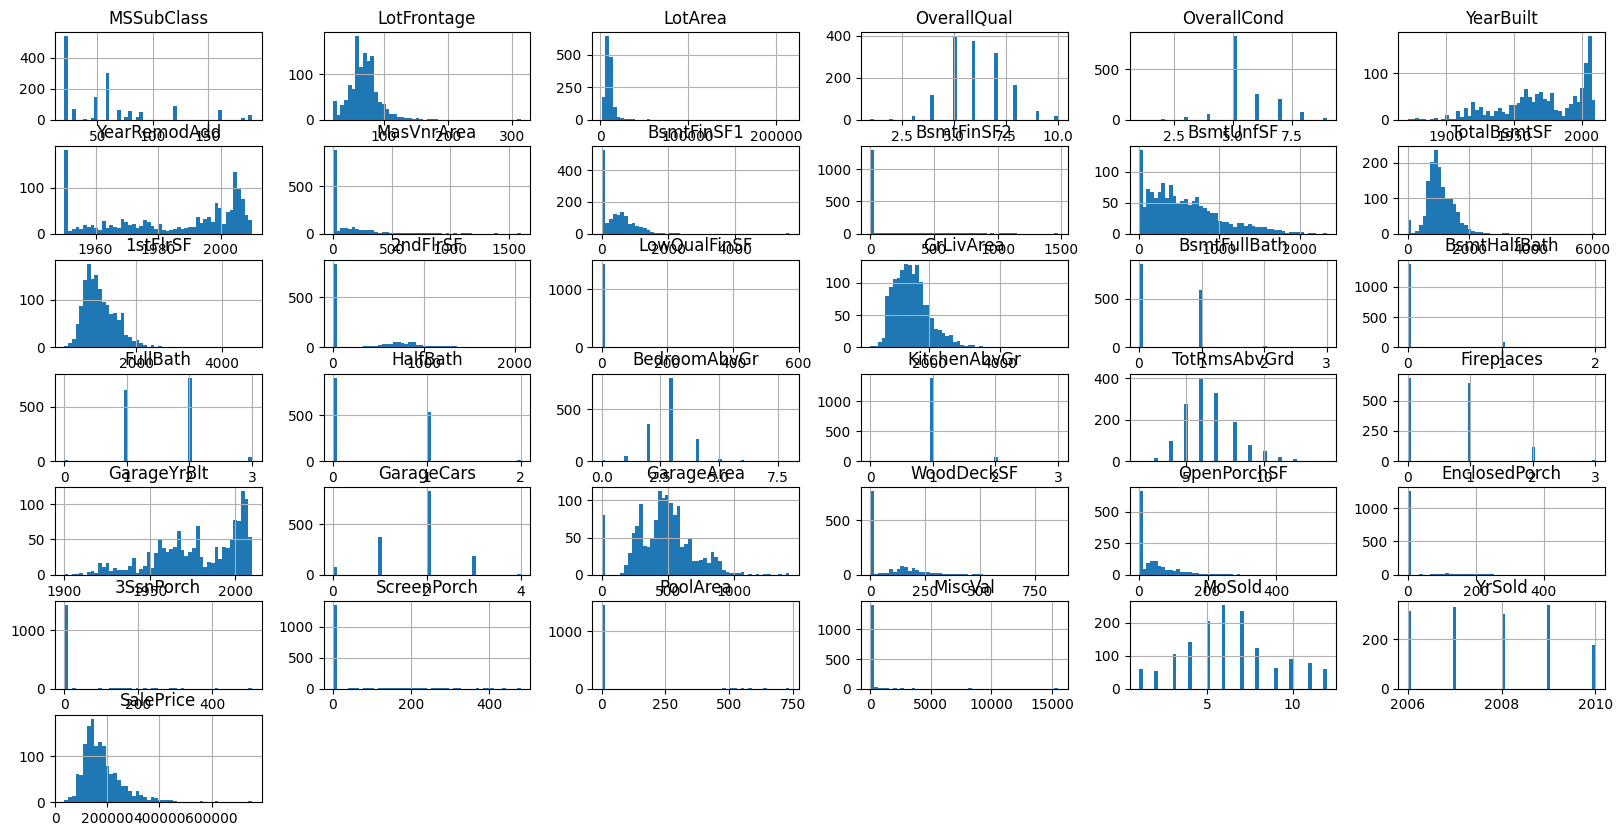

In [8]:
data.hist(bins = 50, figsize = (20,10))
plt.show()

## Visualization : Column Histograms




In [9]:
# Defining the target name
target_name = 'SalePrice'

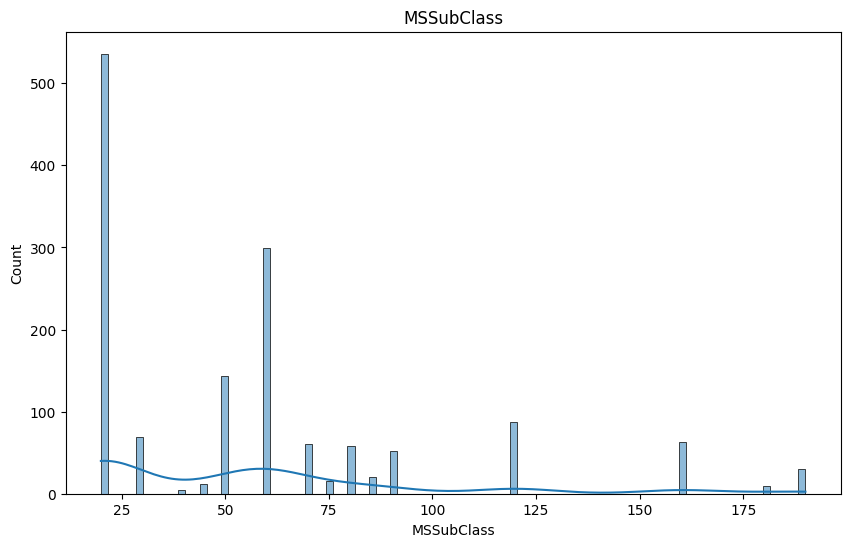

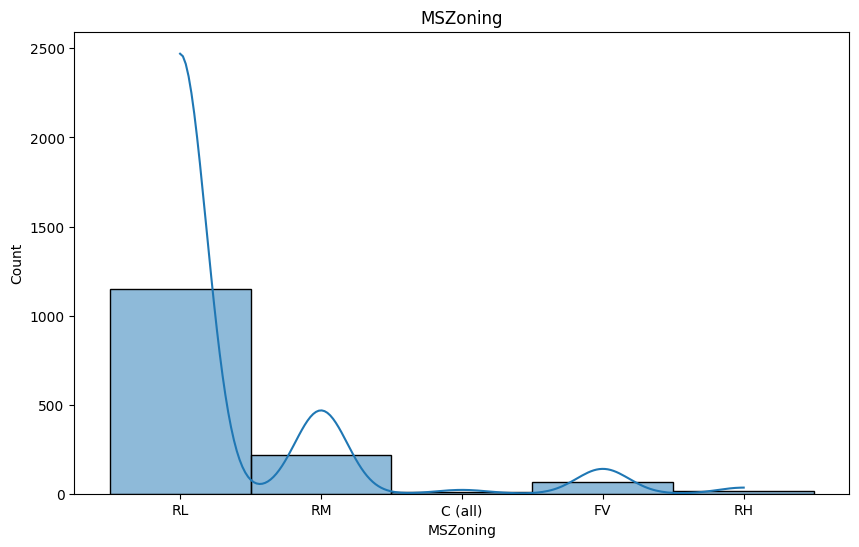

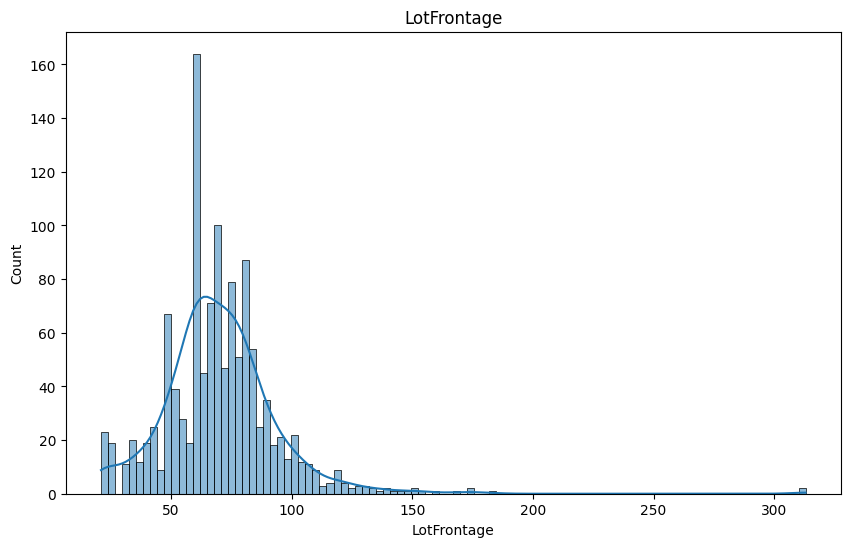

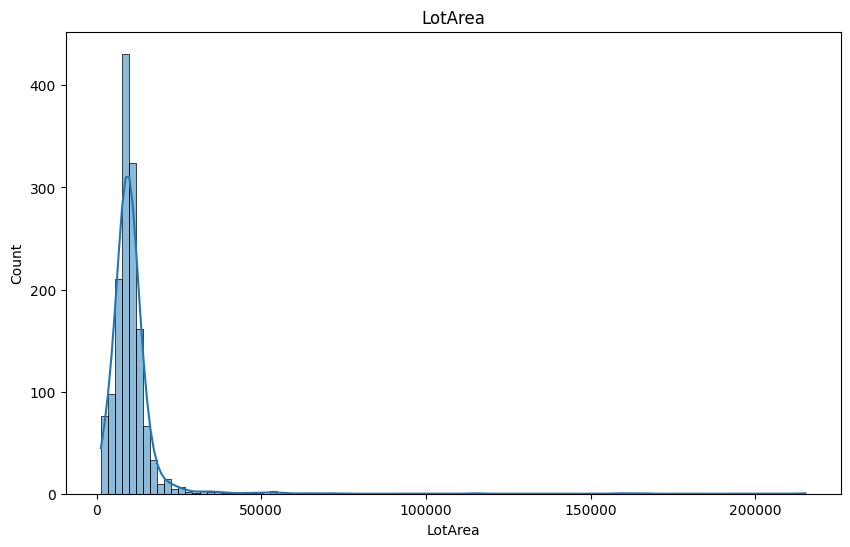

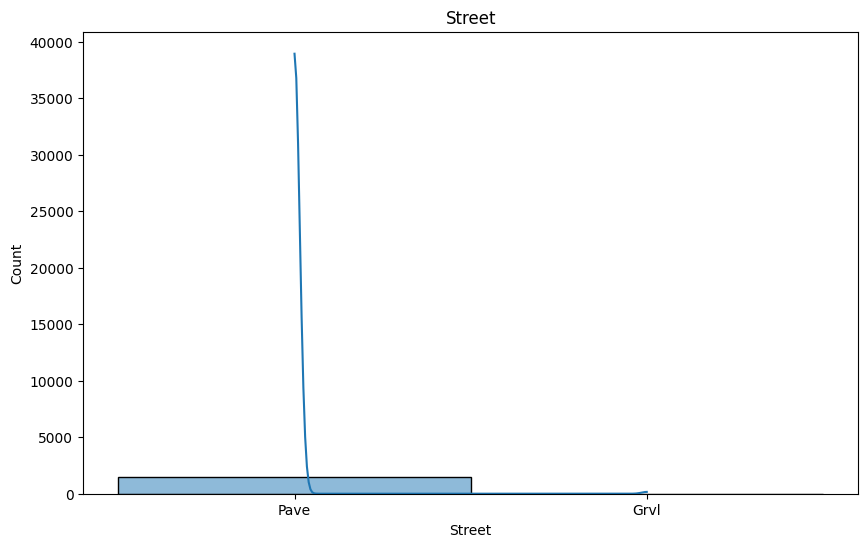

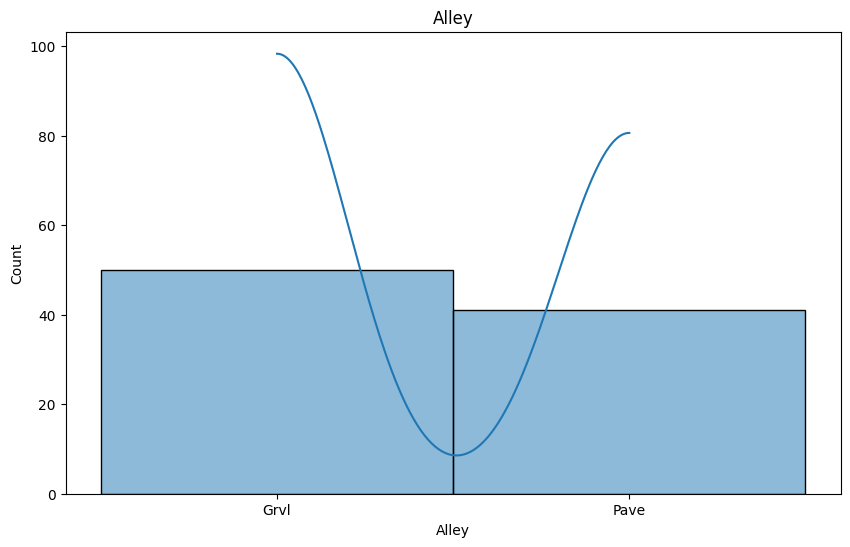

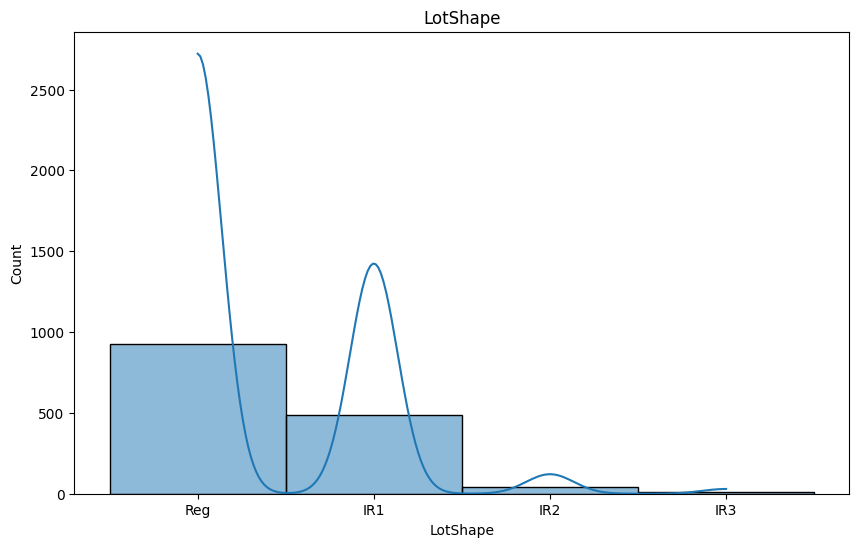

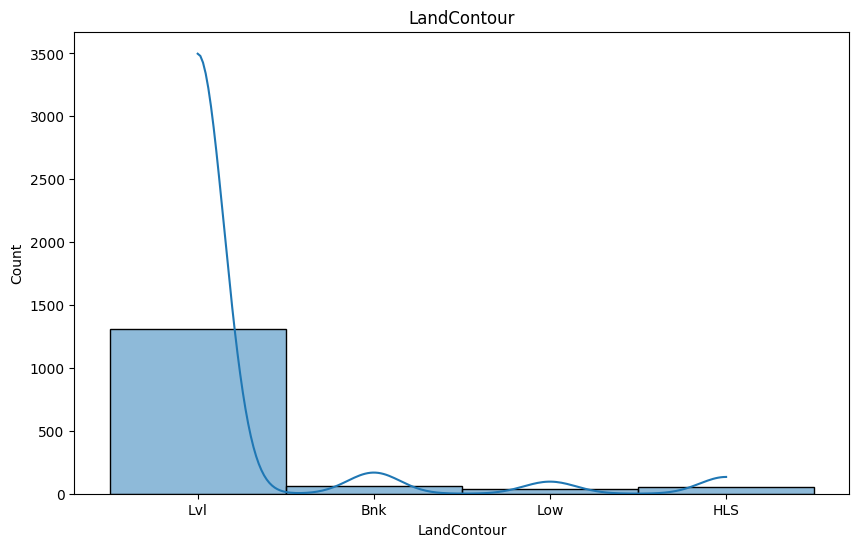

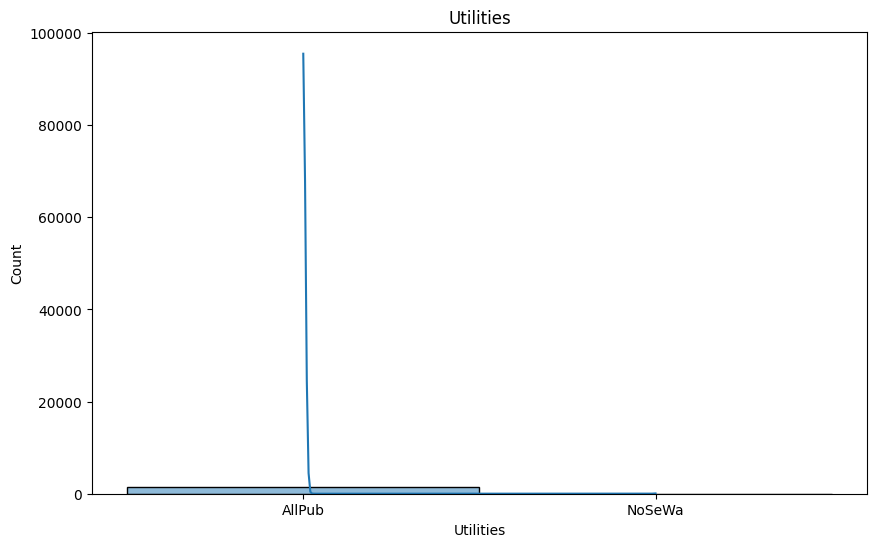

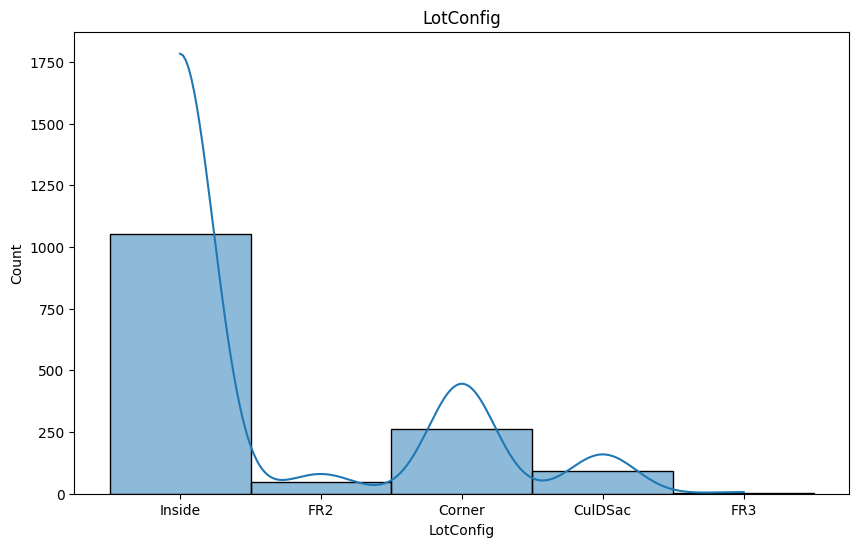

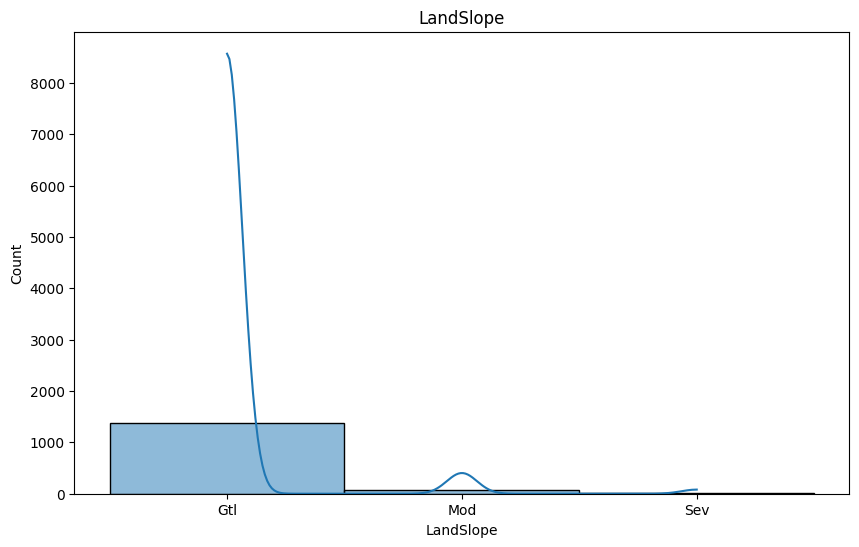

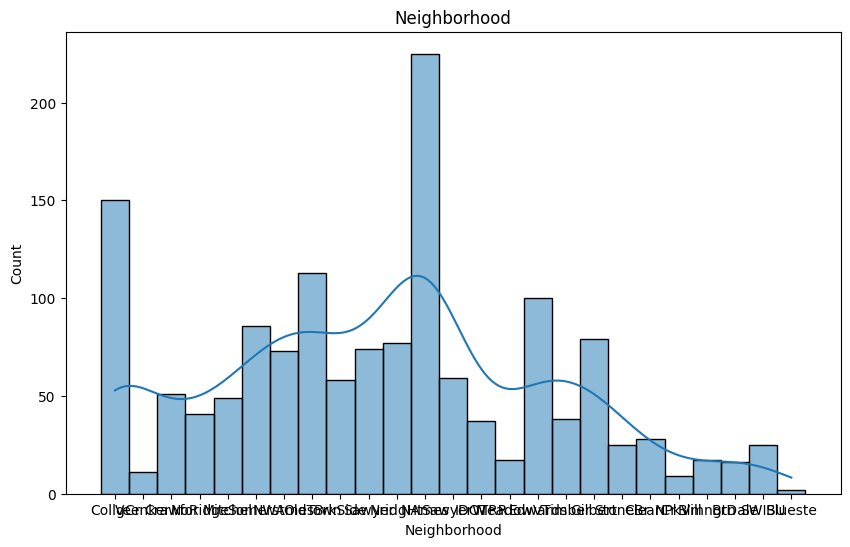

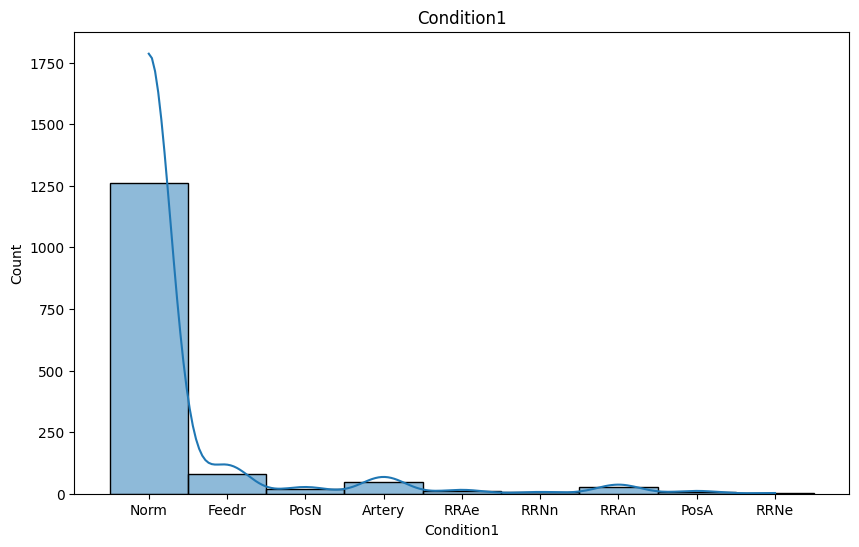

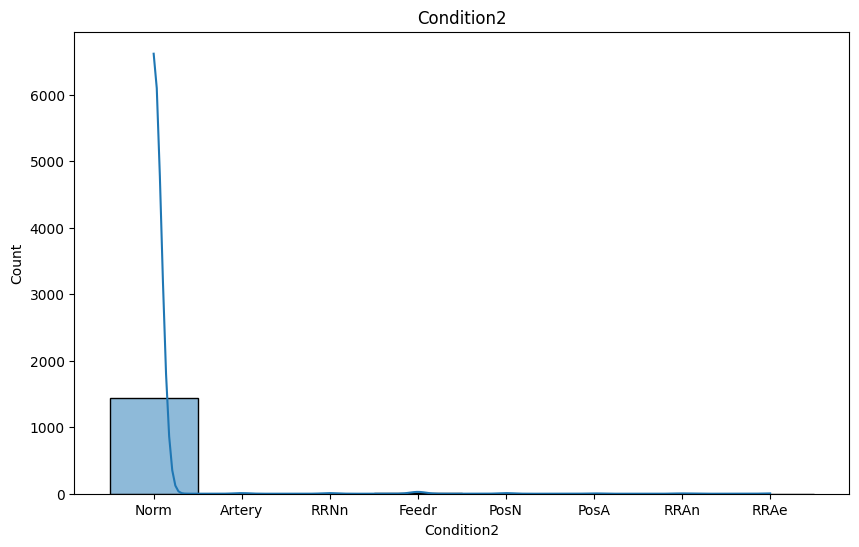

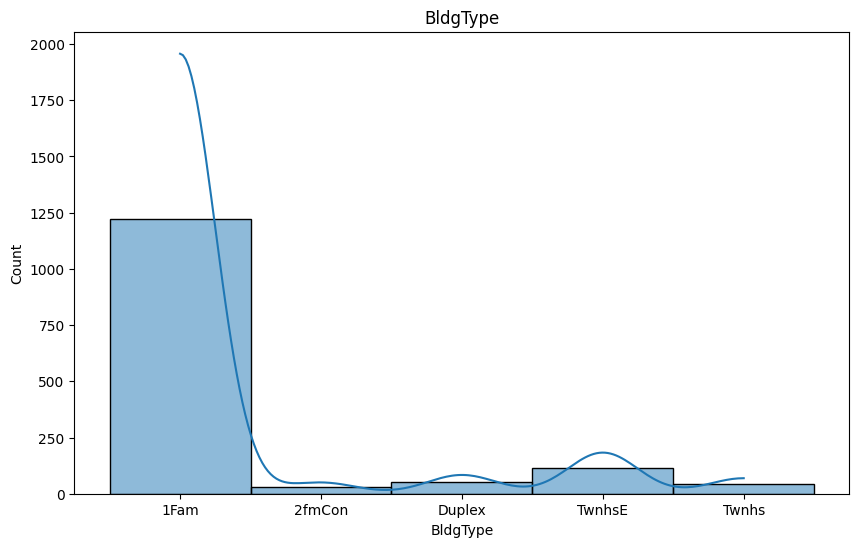

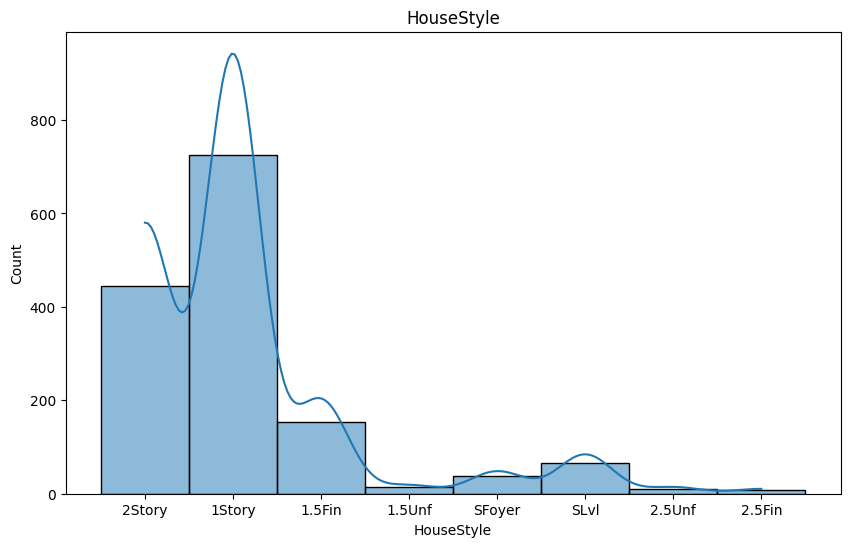

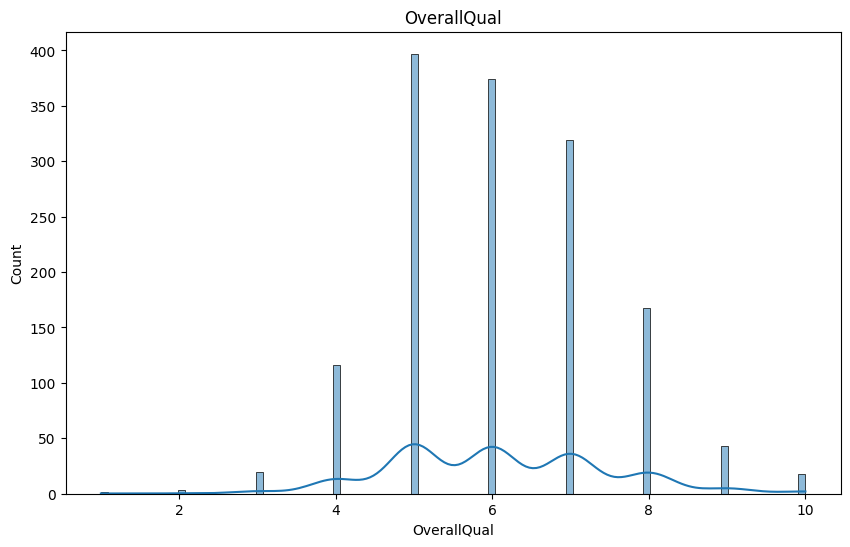

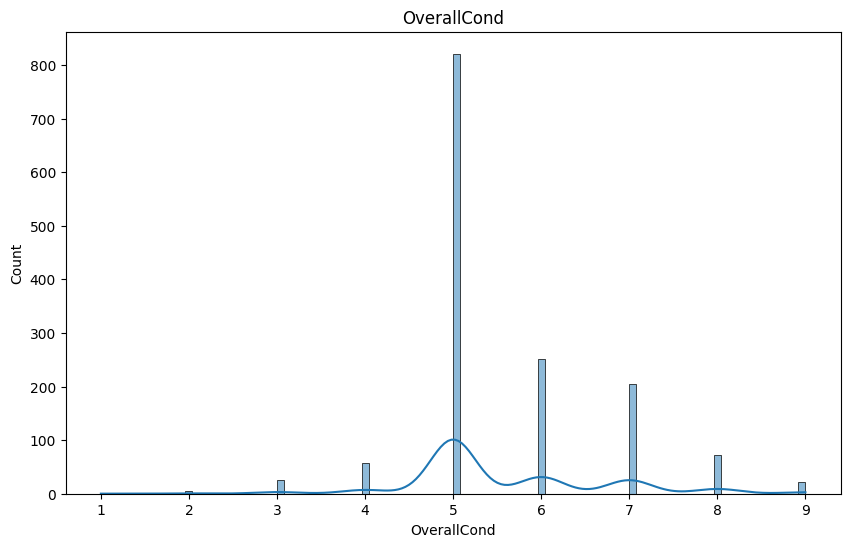

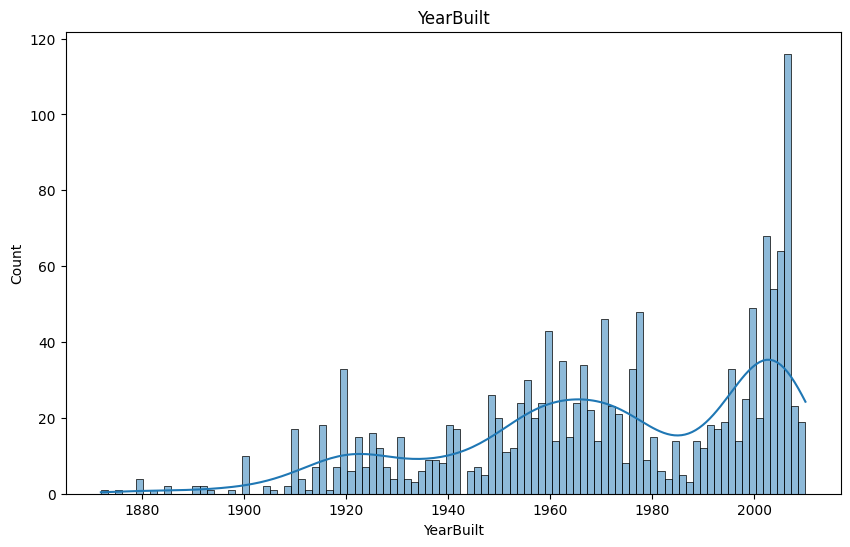

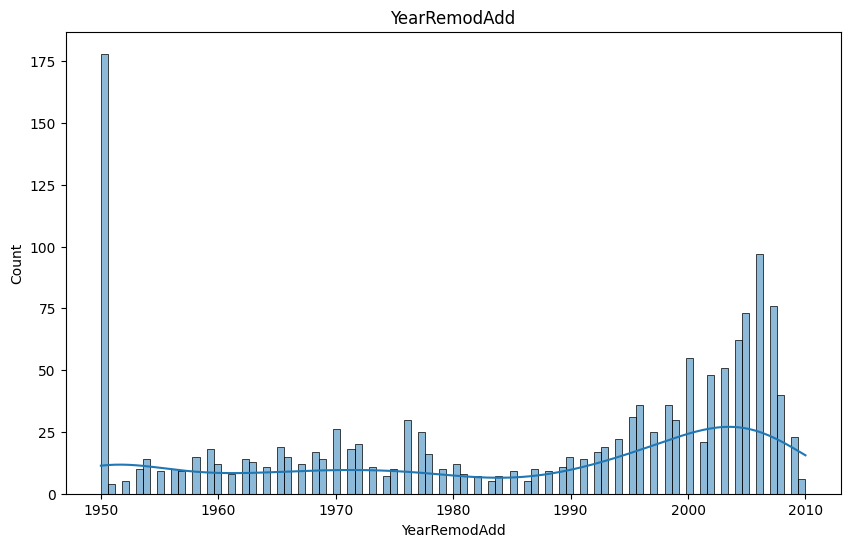

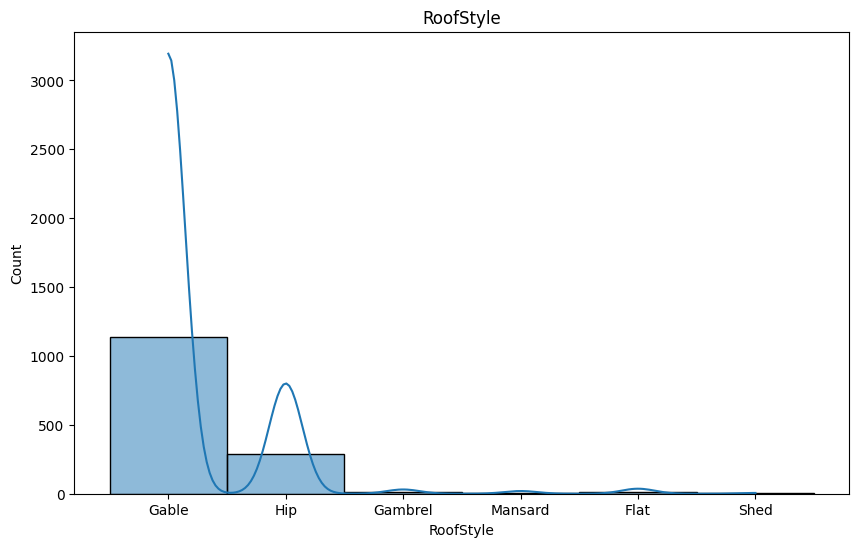

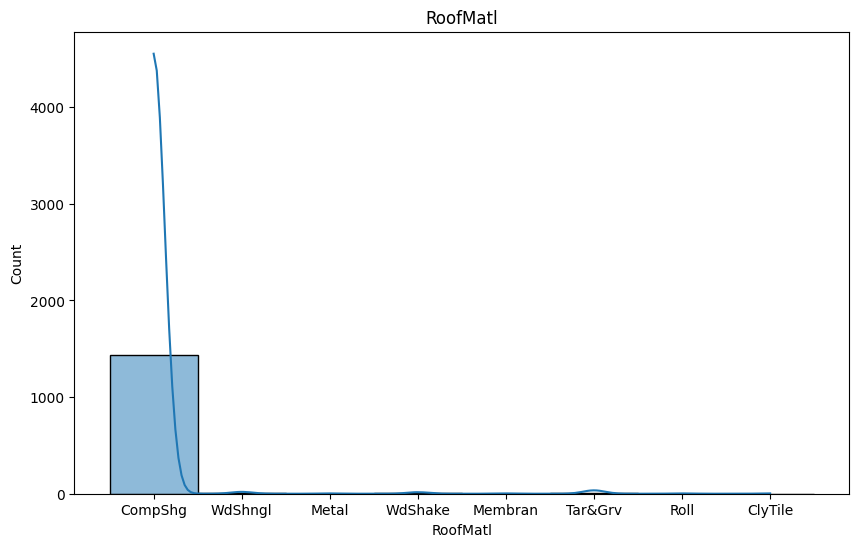

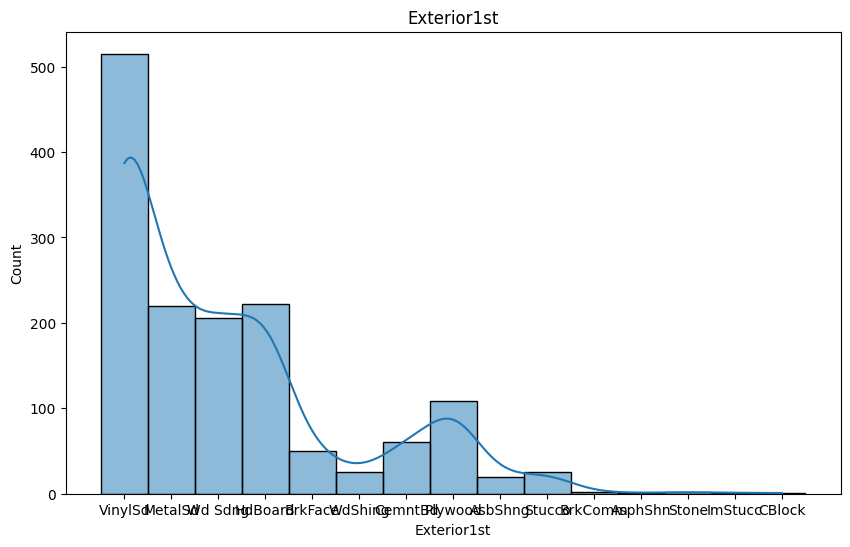

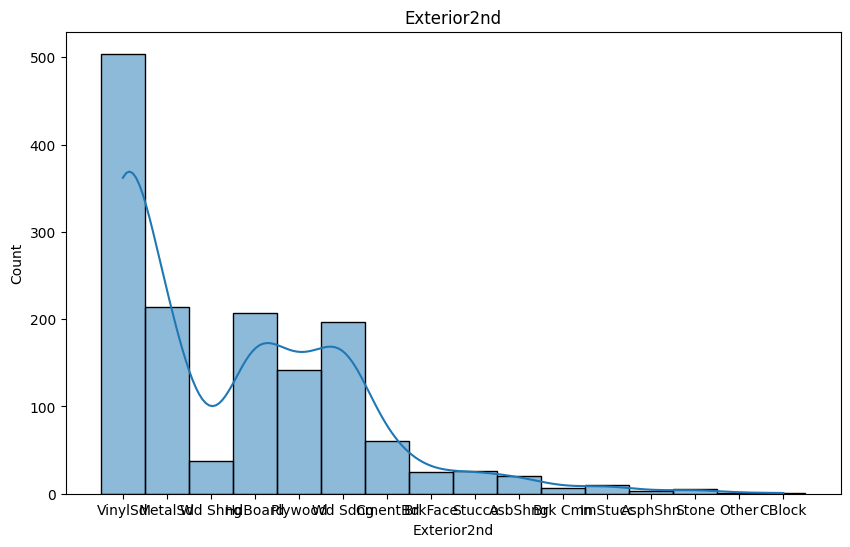

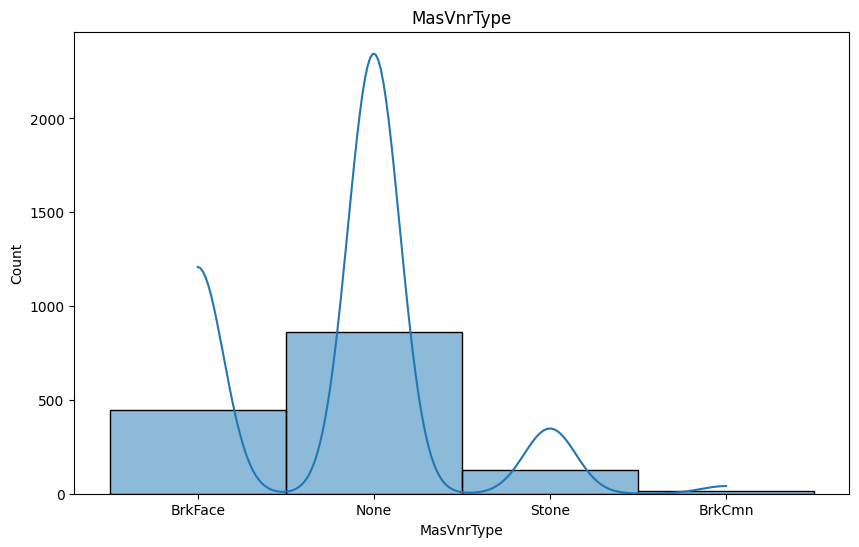

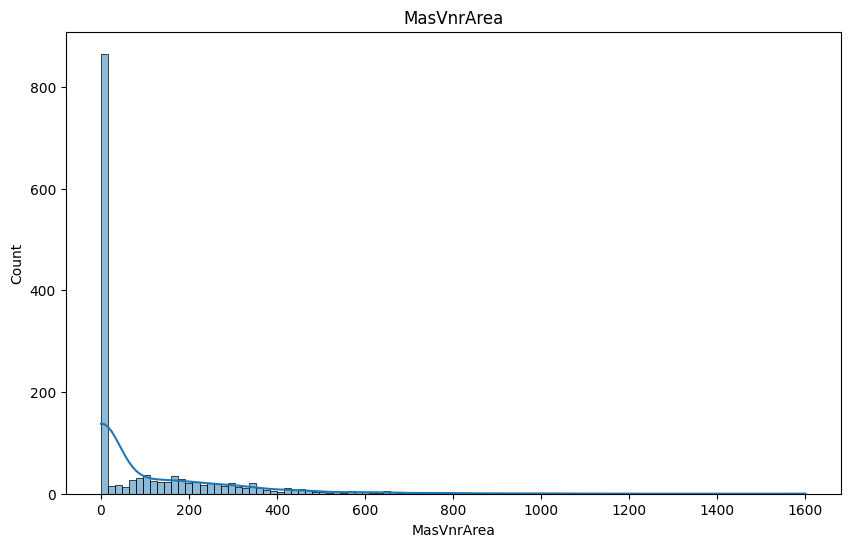

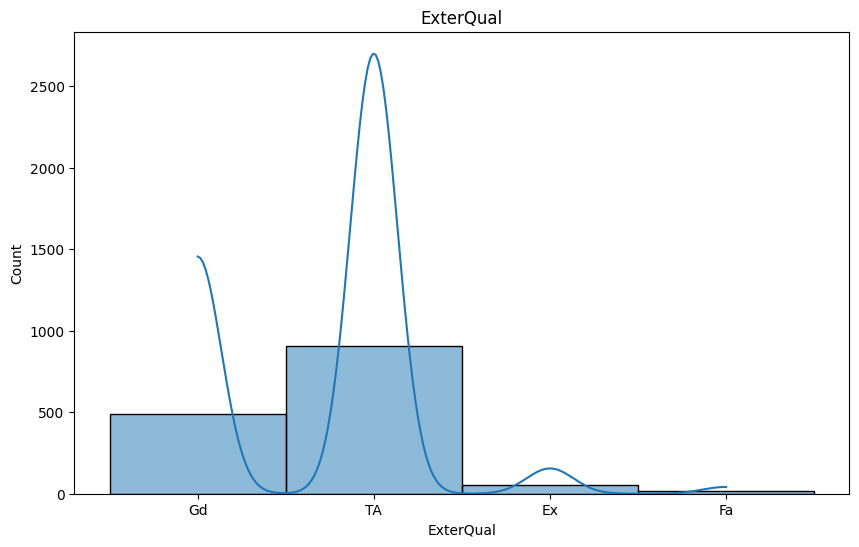

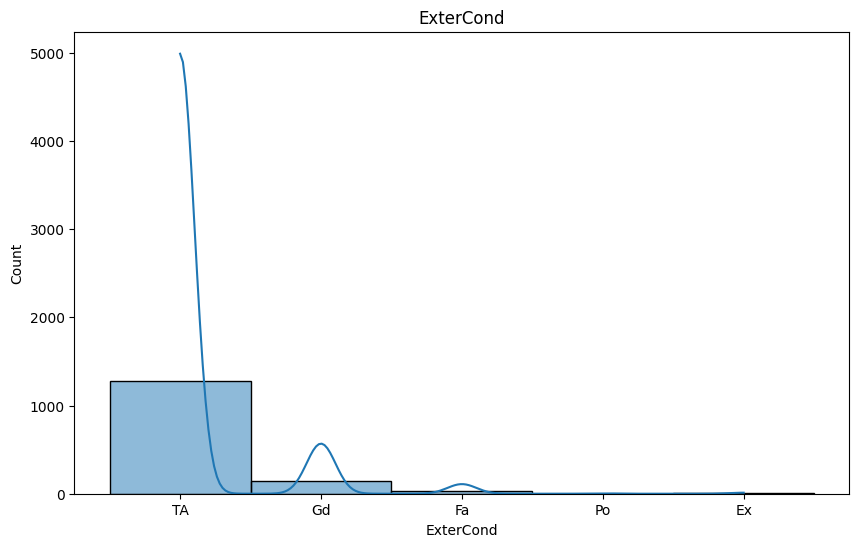

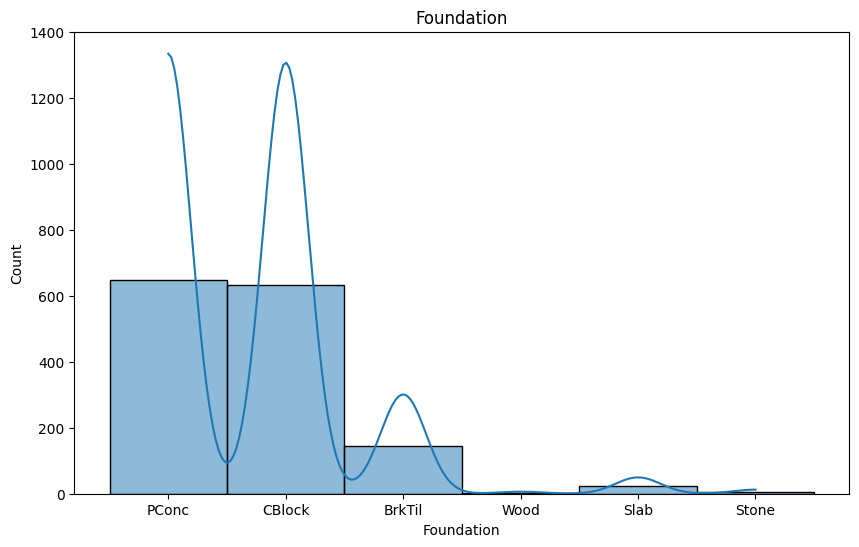

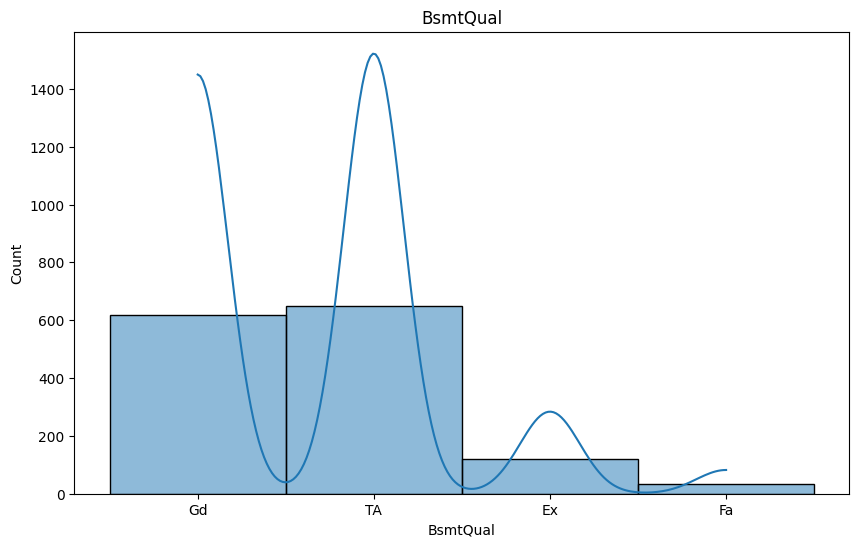

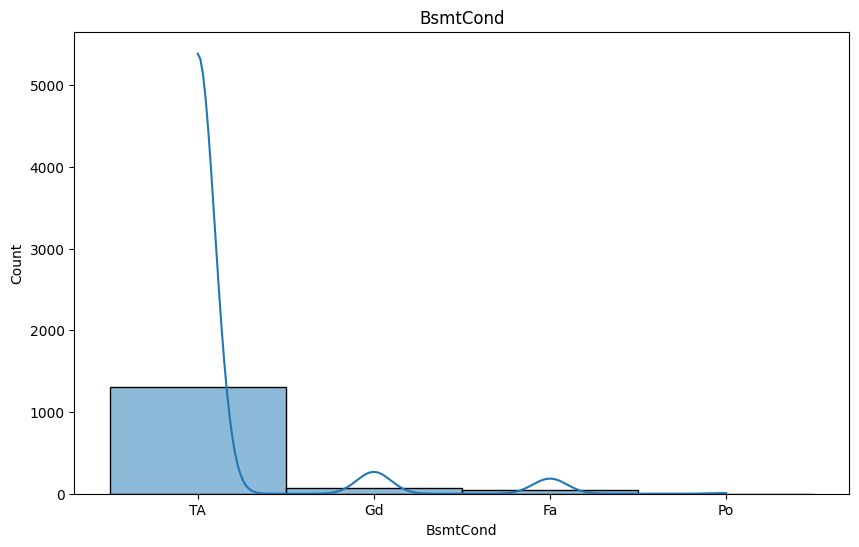

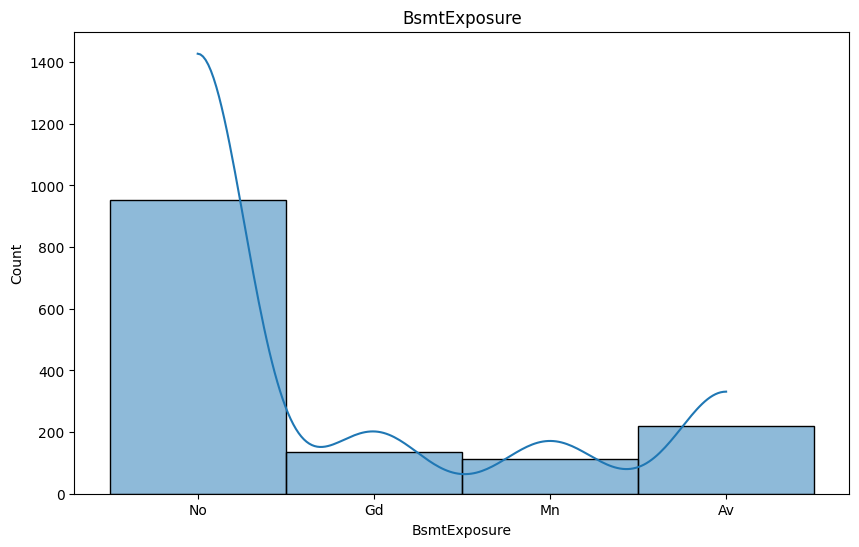

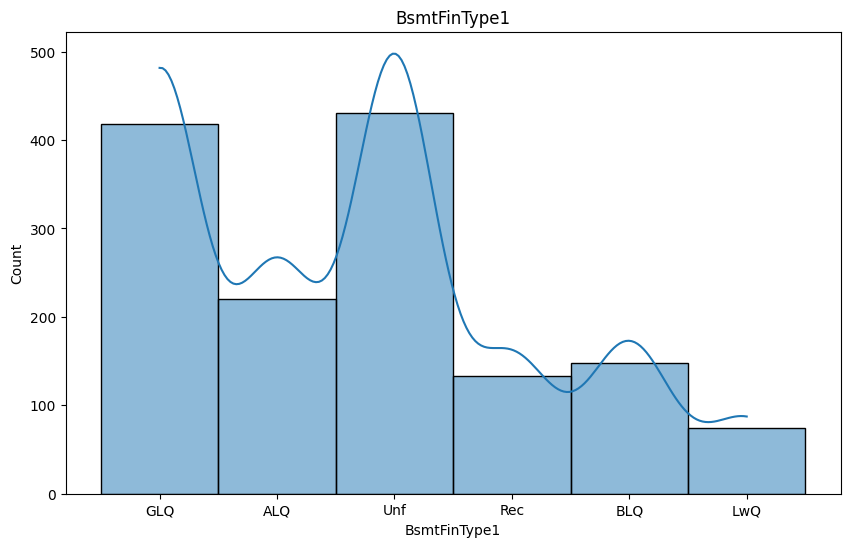

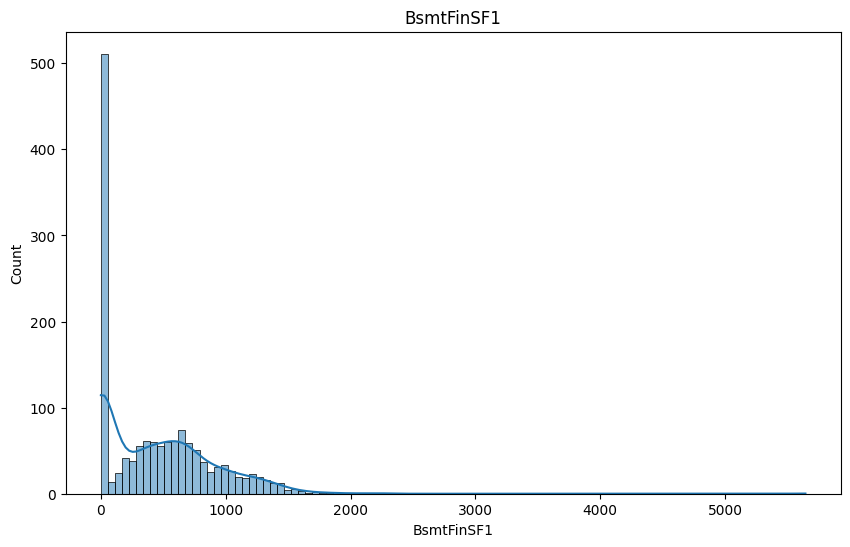

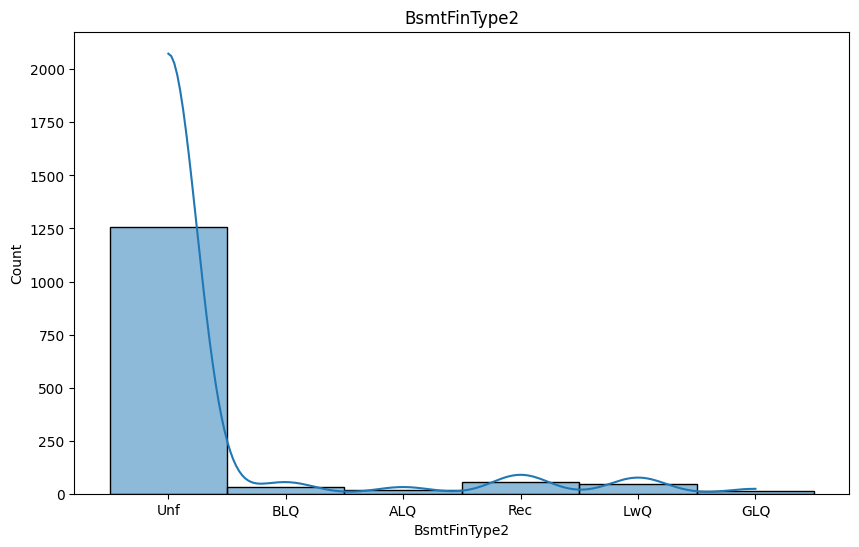

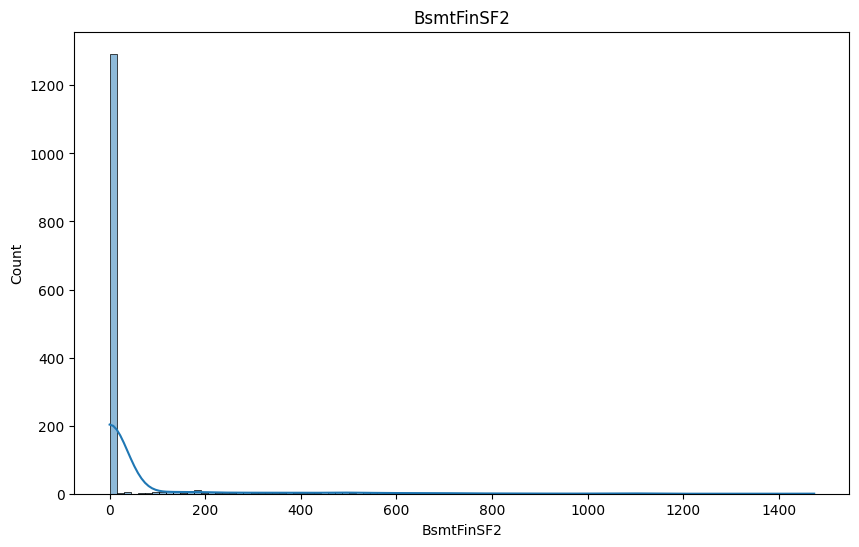

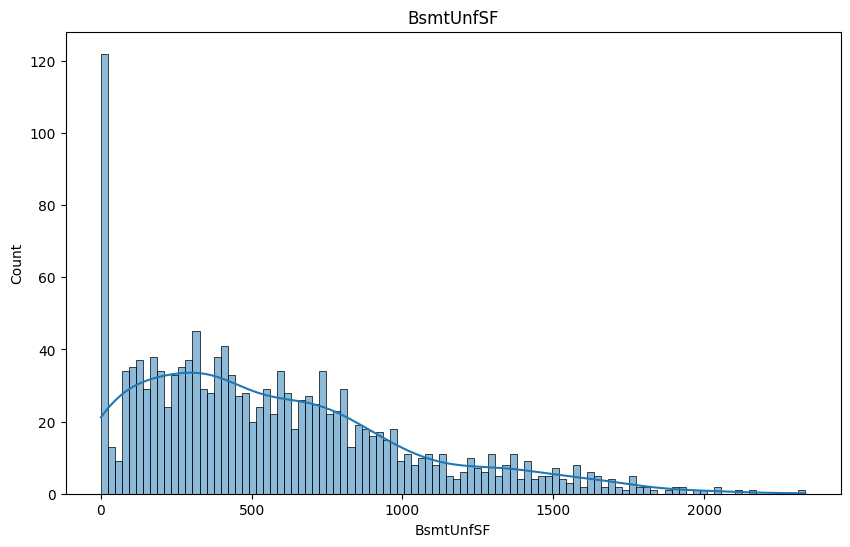

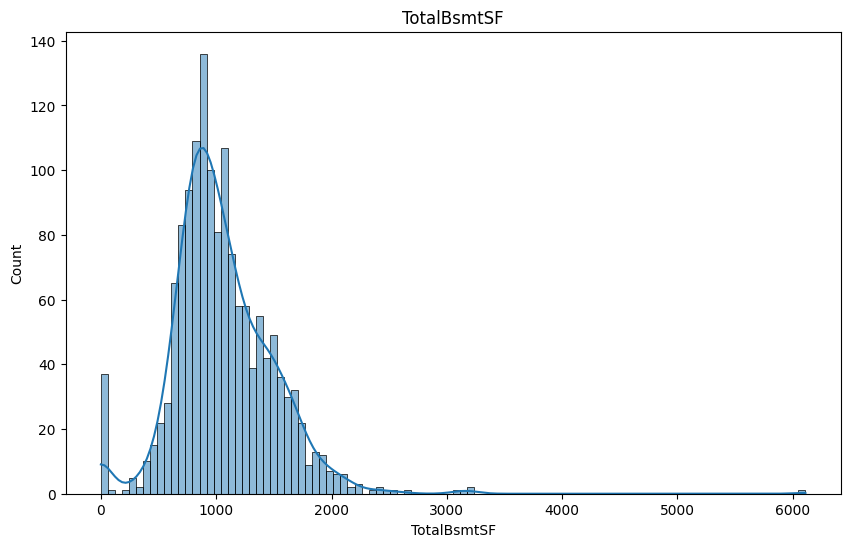

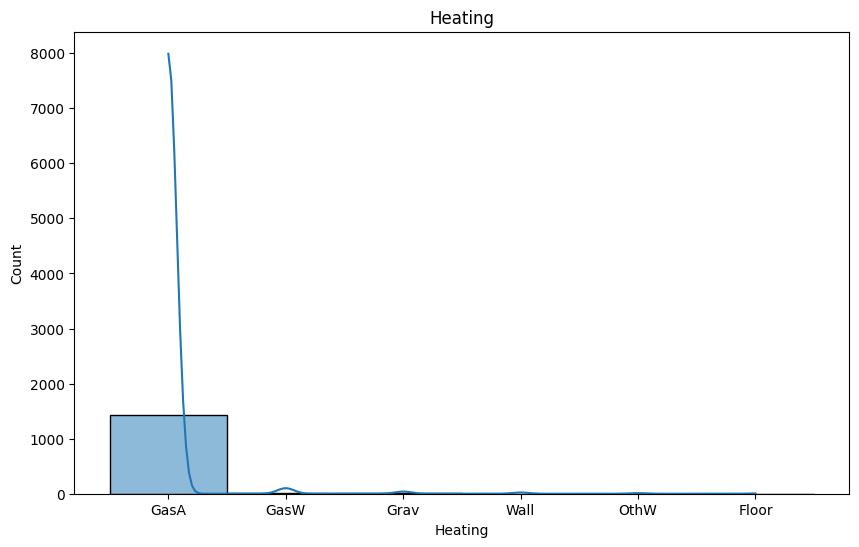

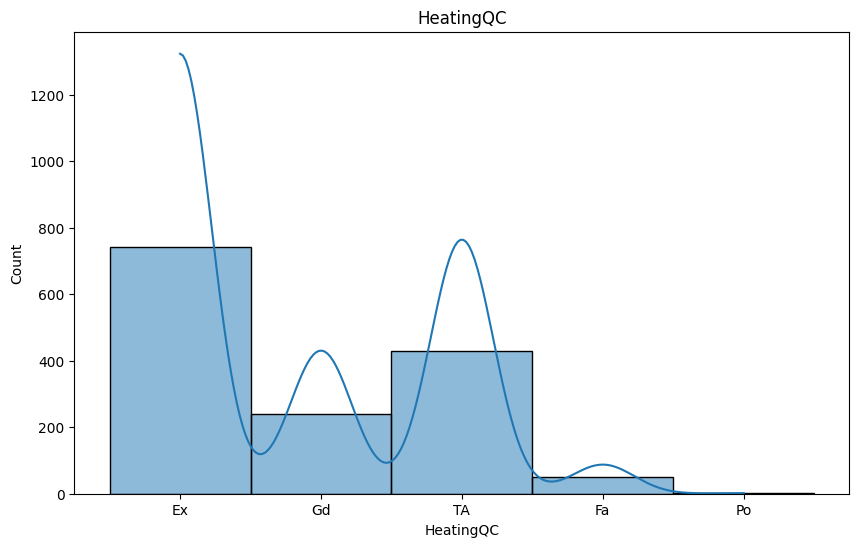

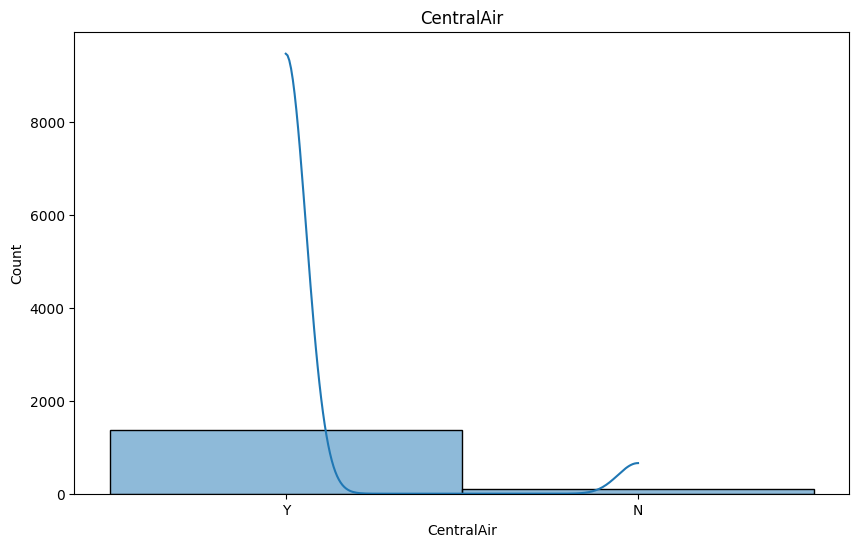

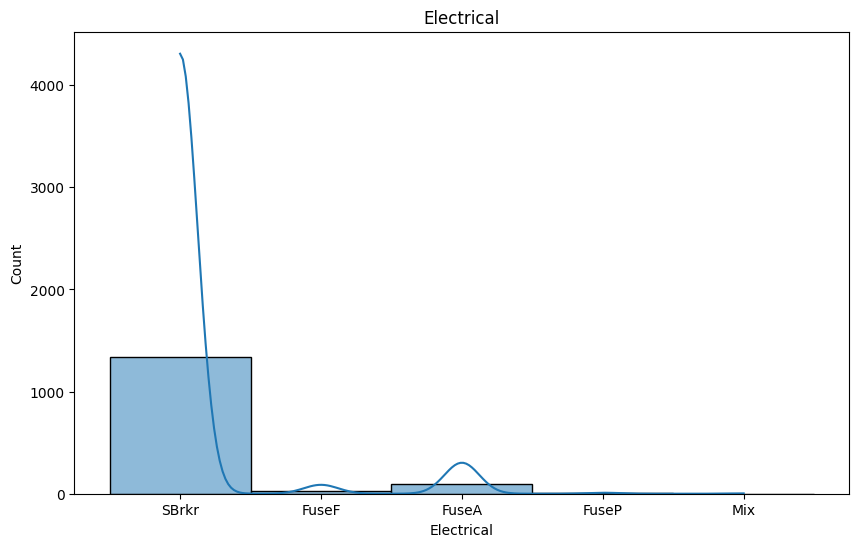

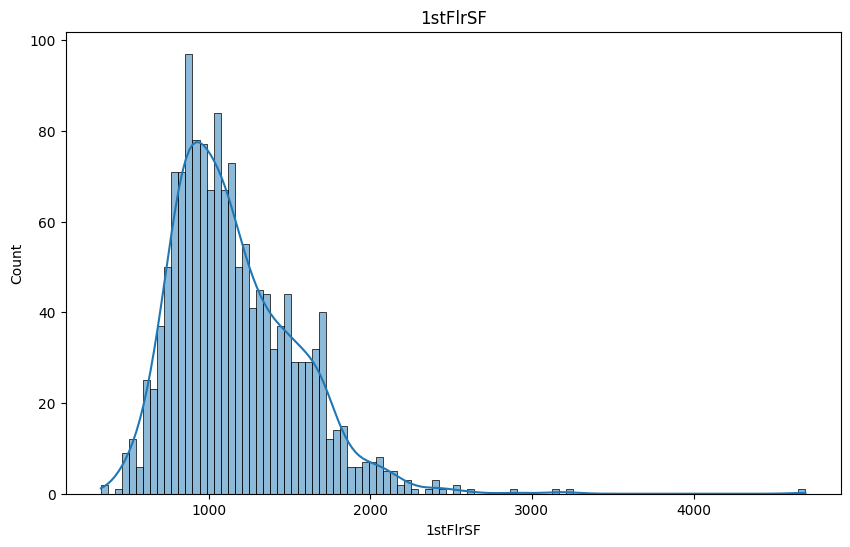

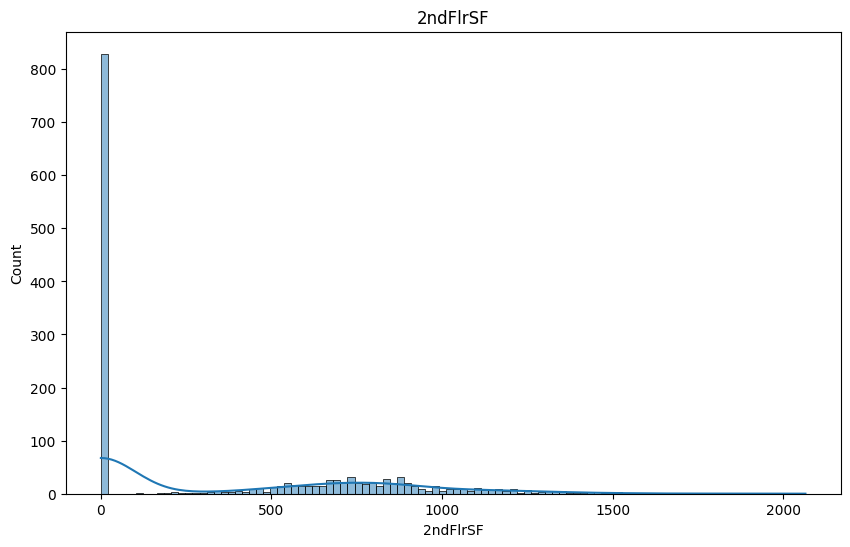

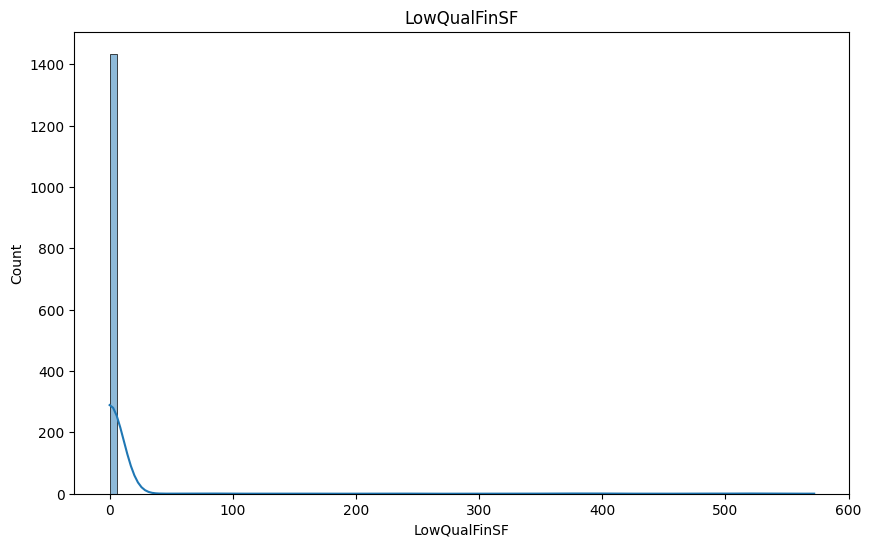

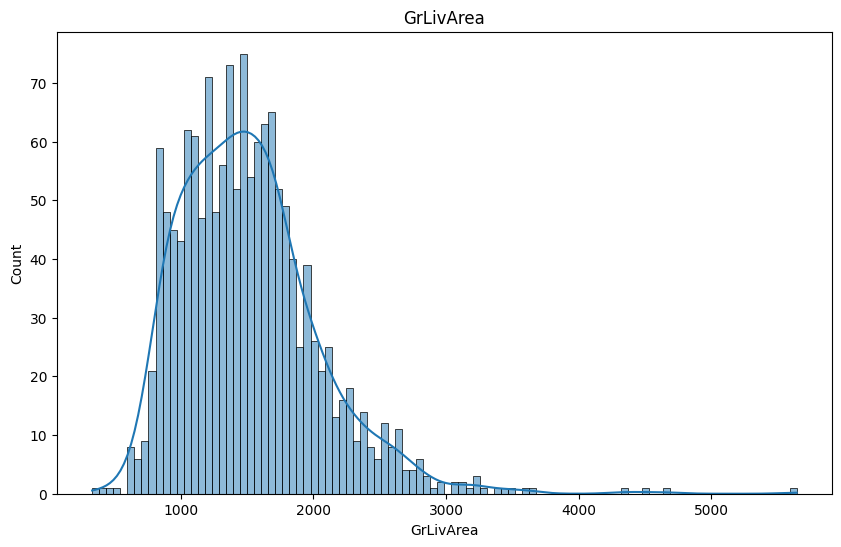

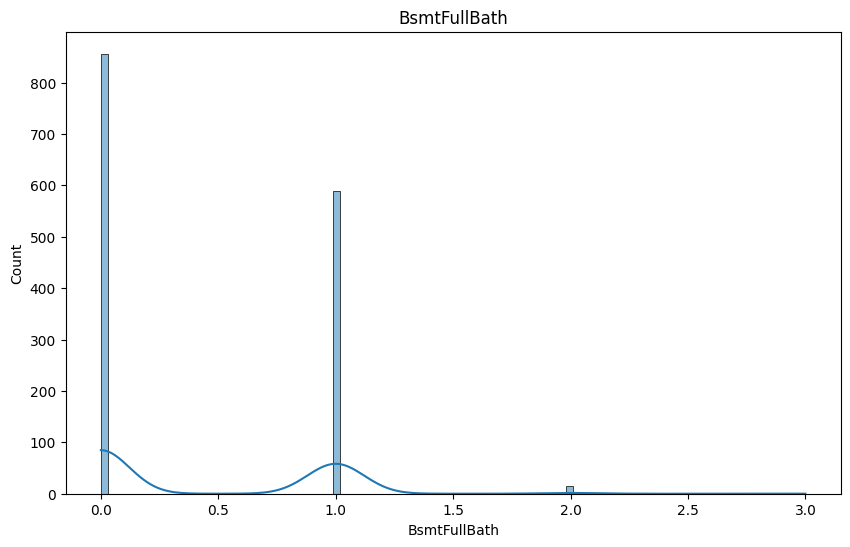

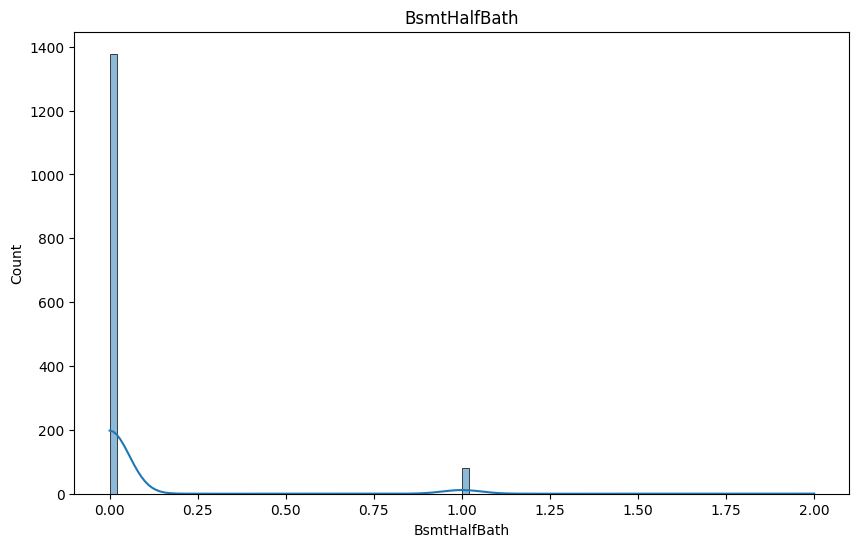

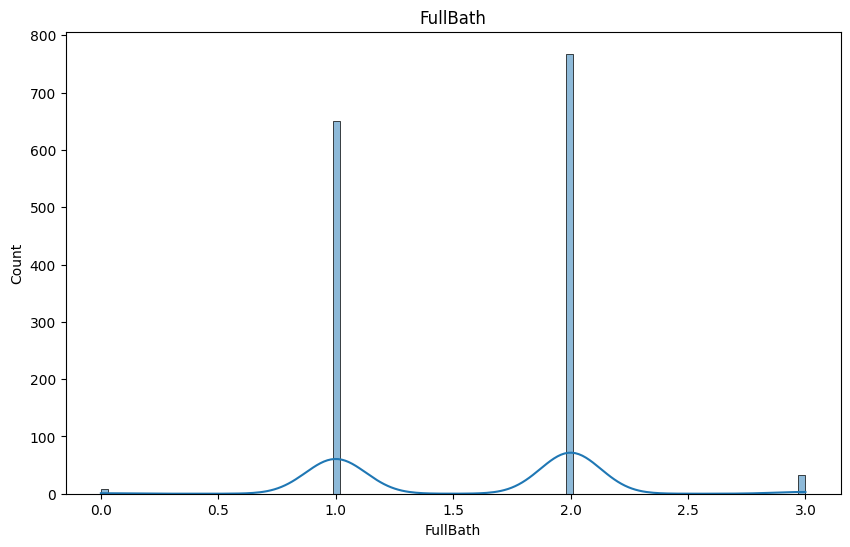

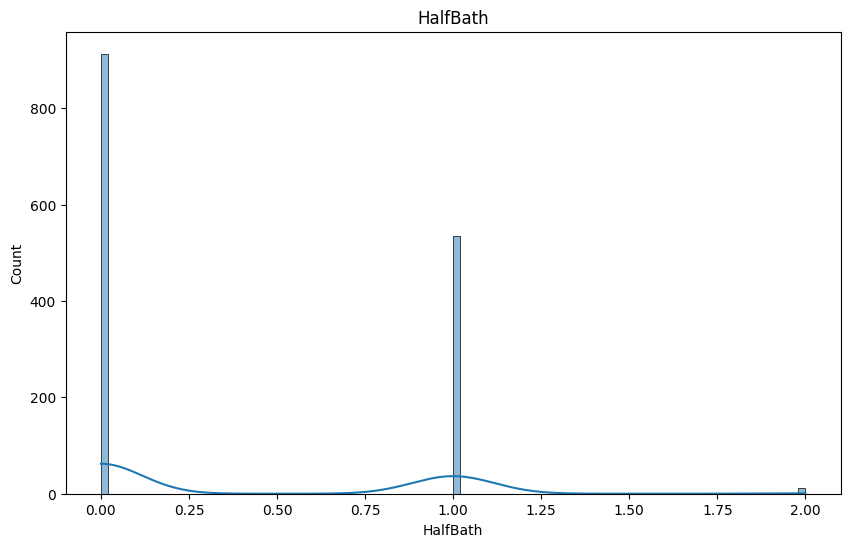

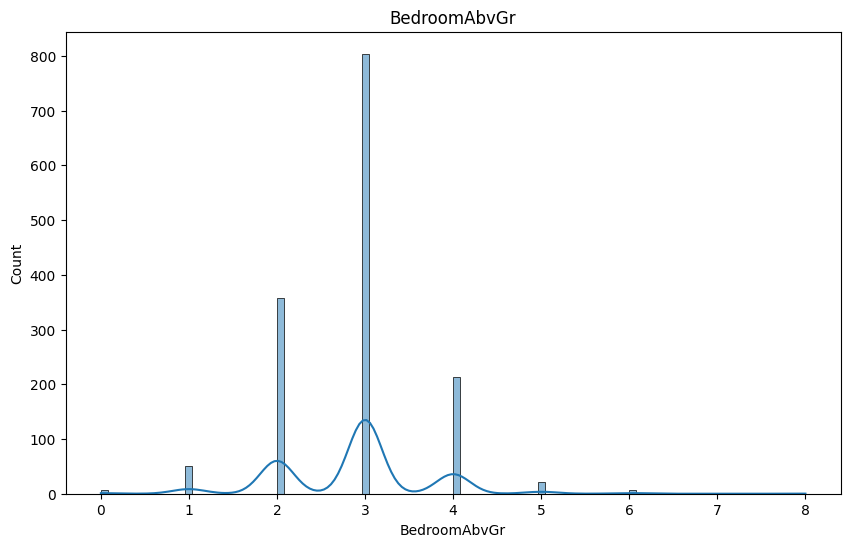

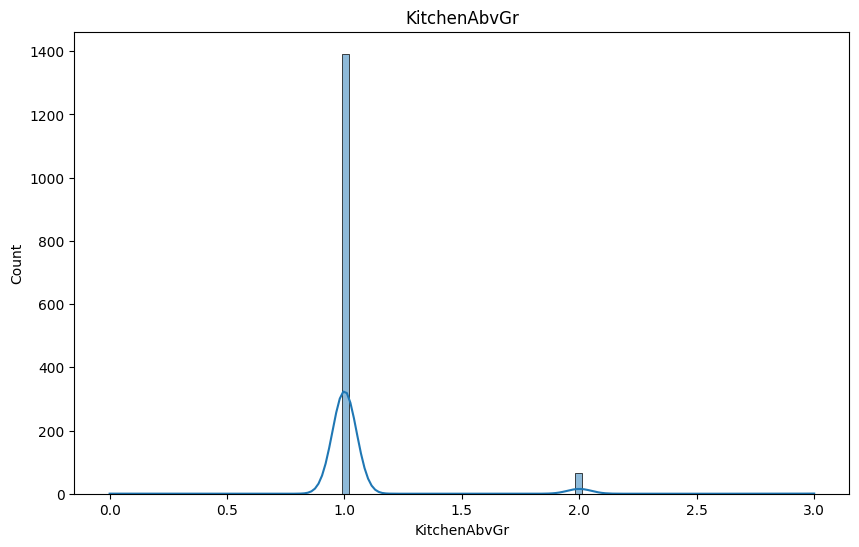

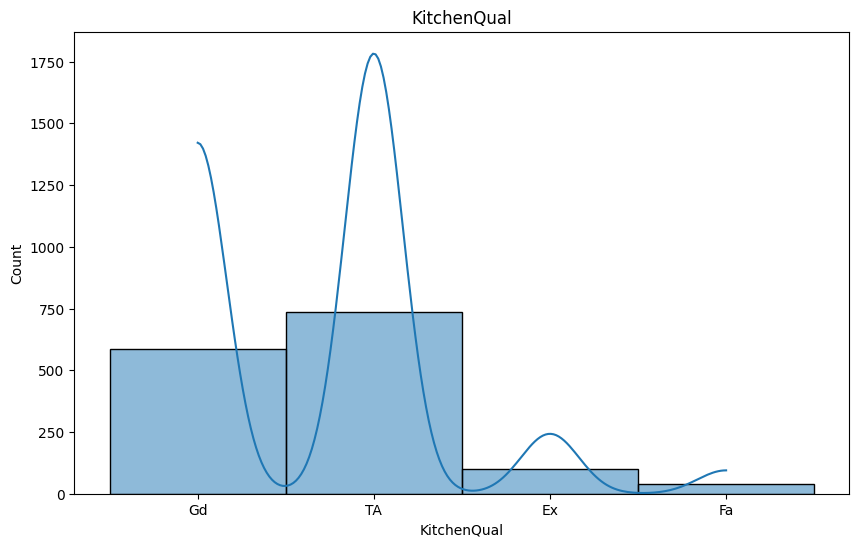

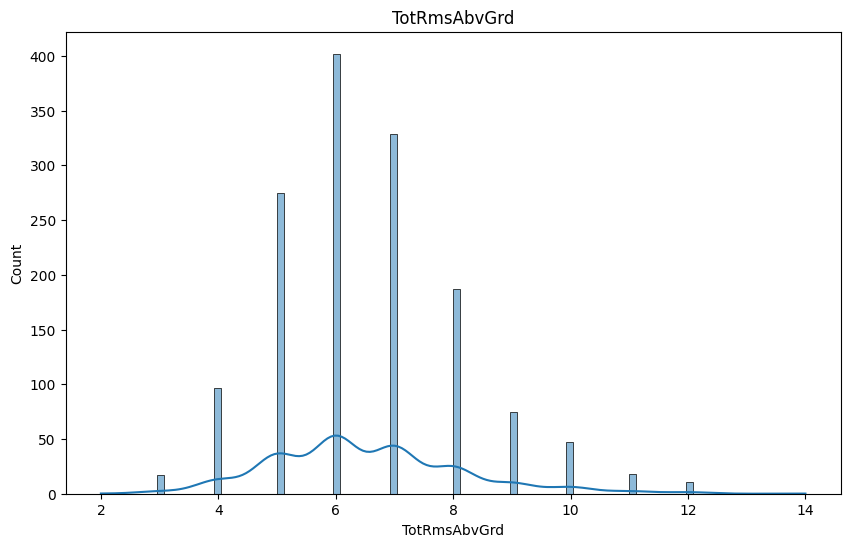

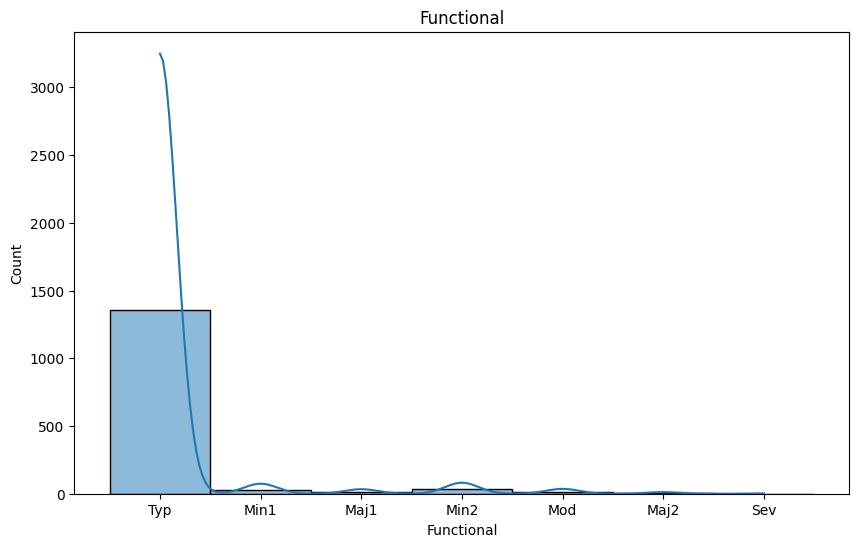

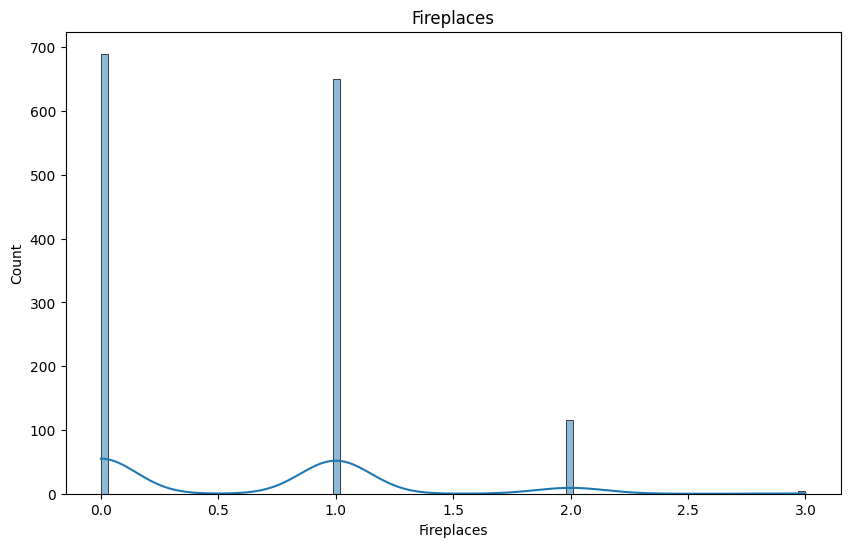

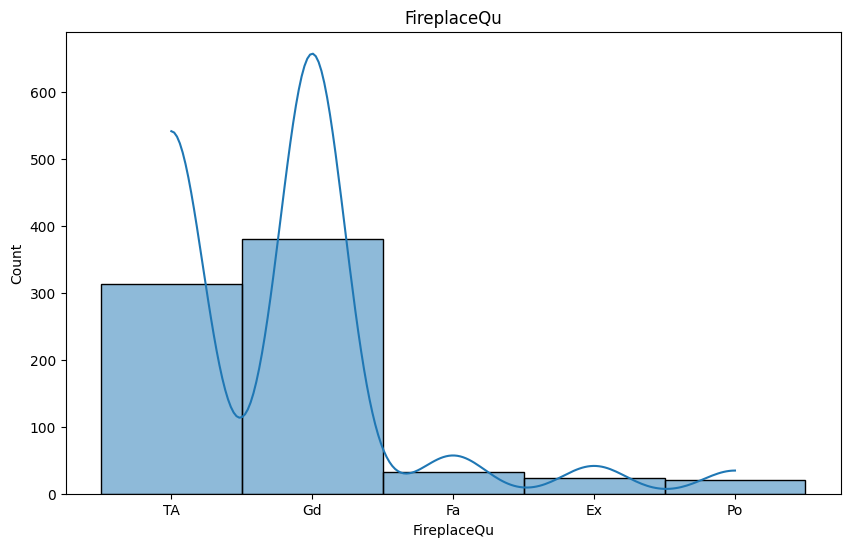

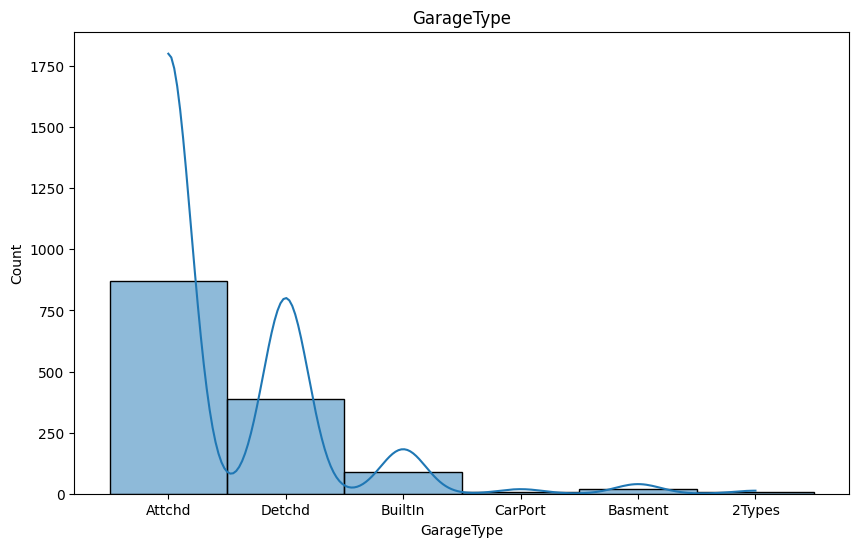

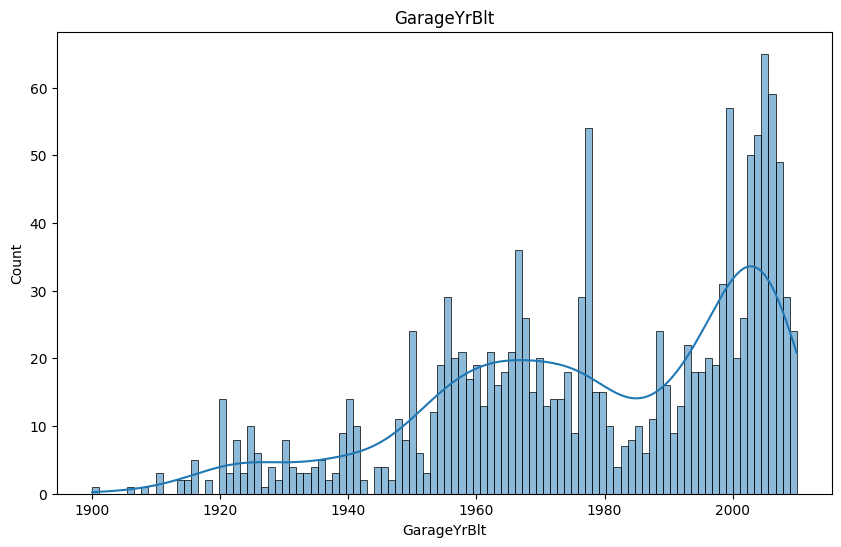

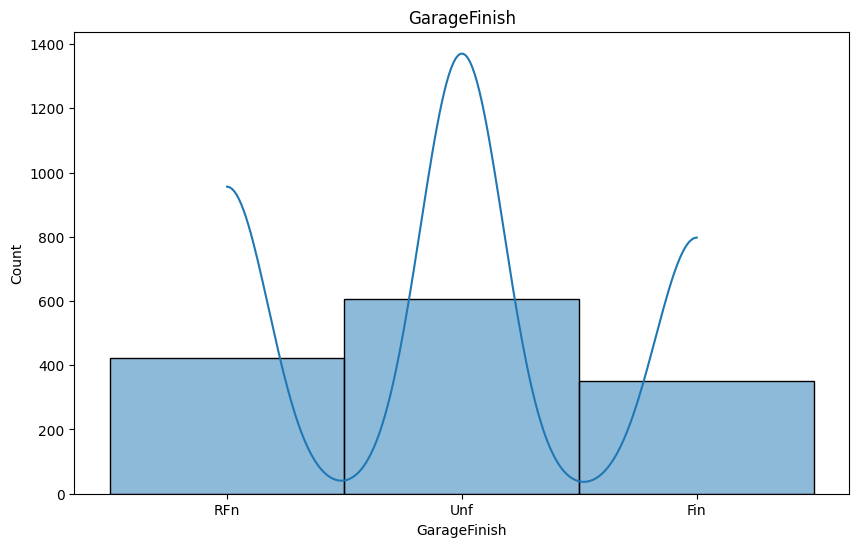

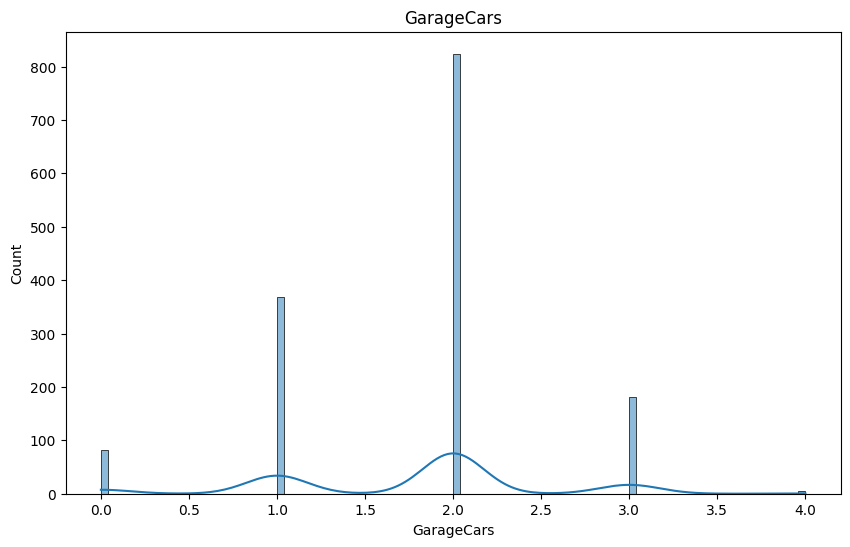

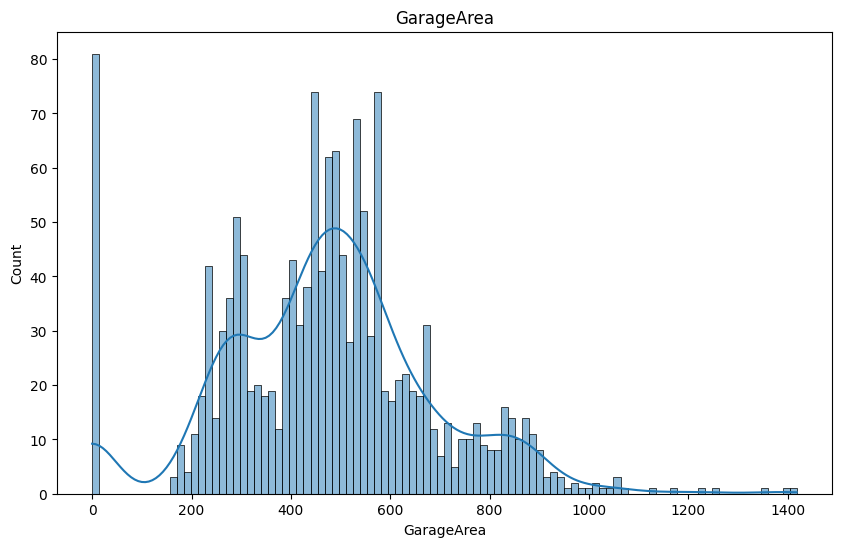

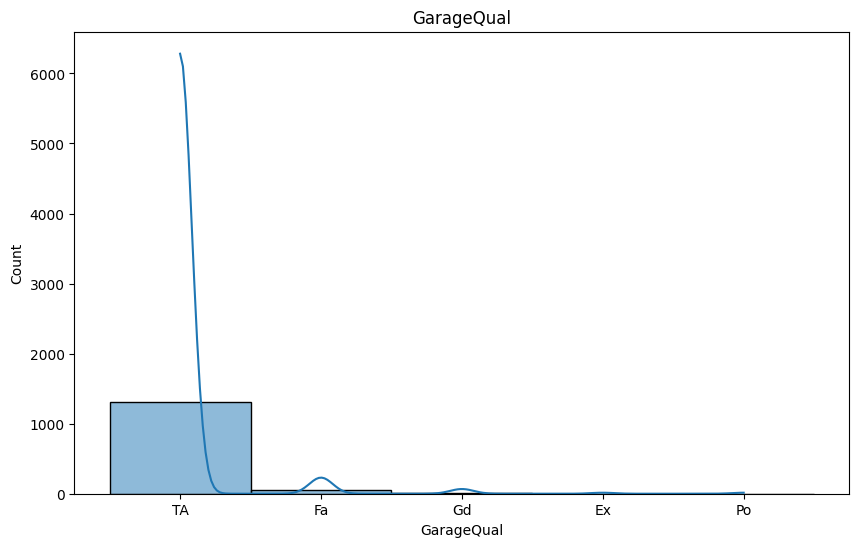

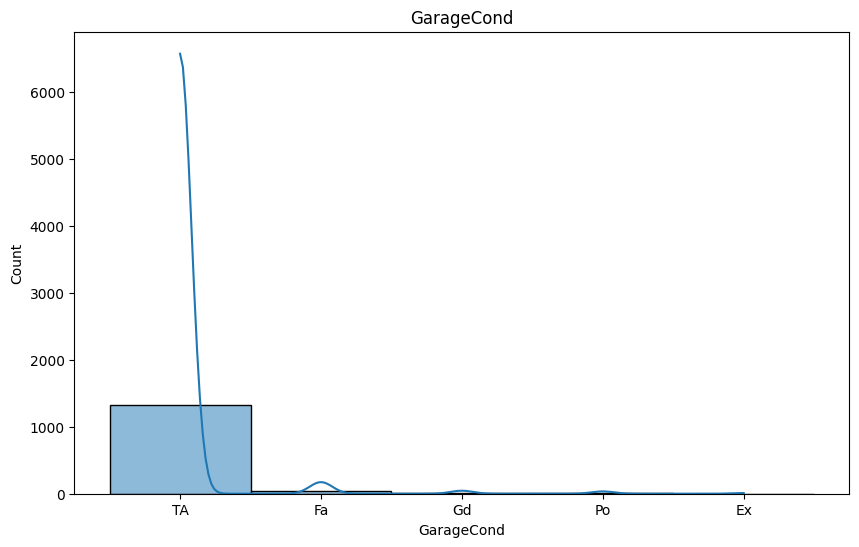

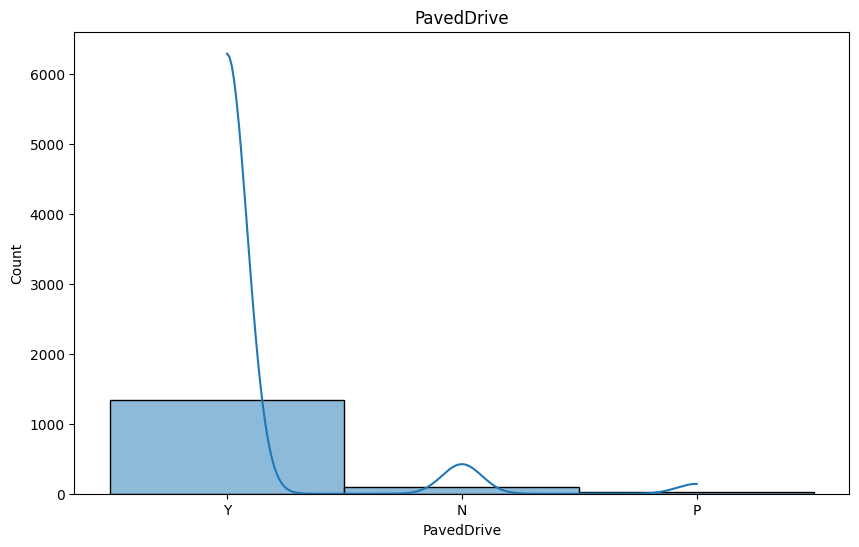

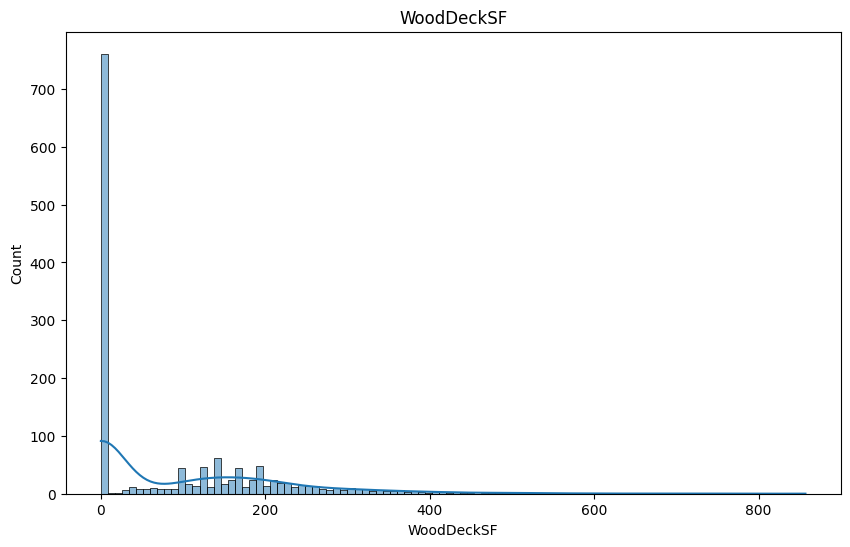

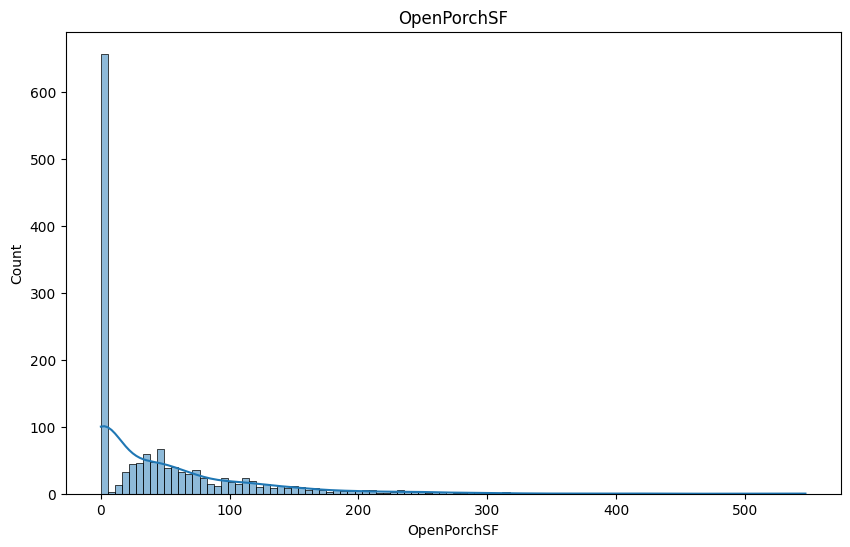

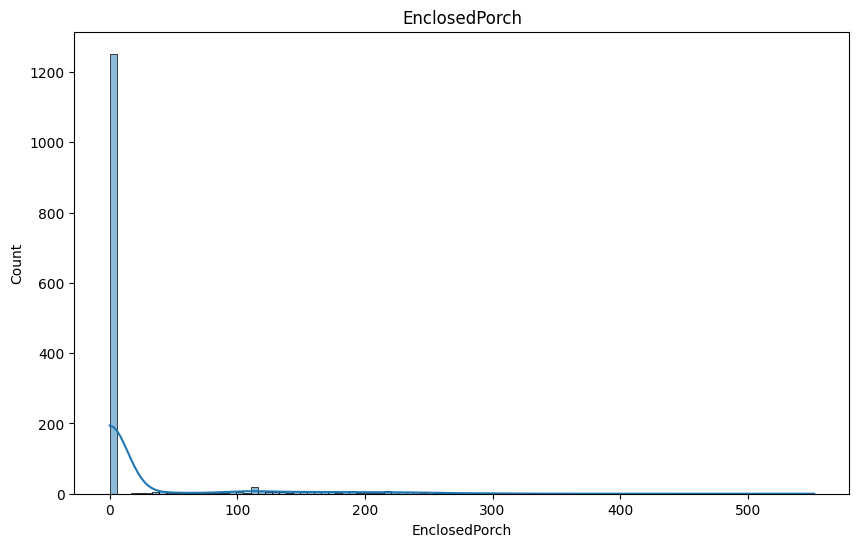

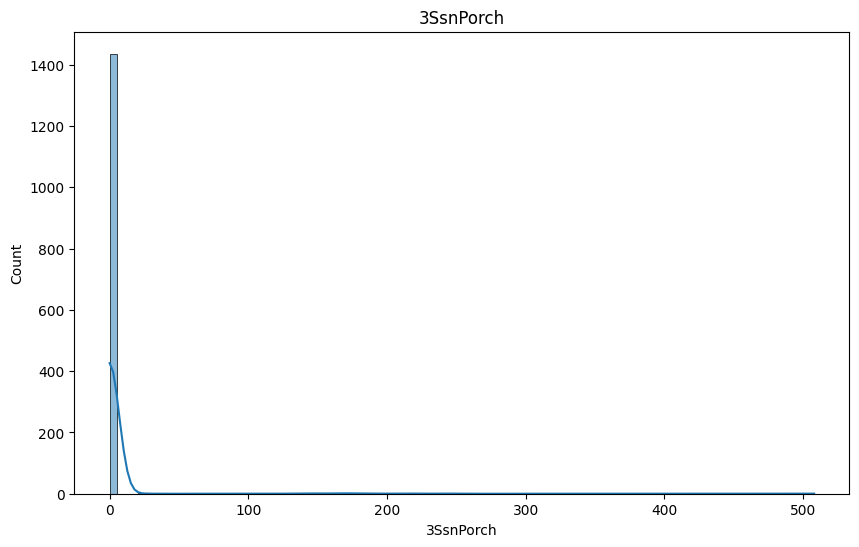

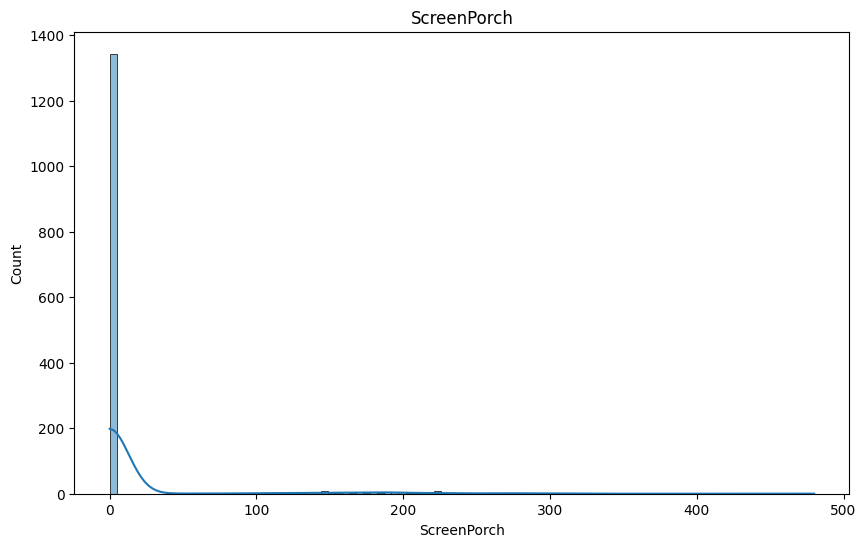

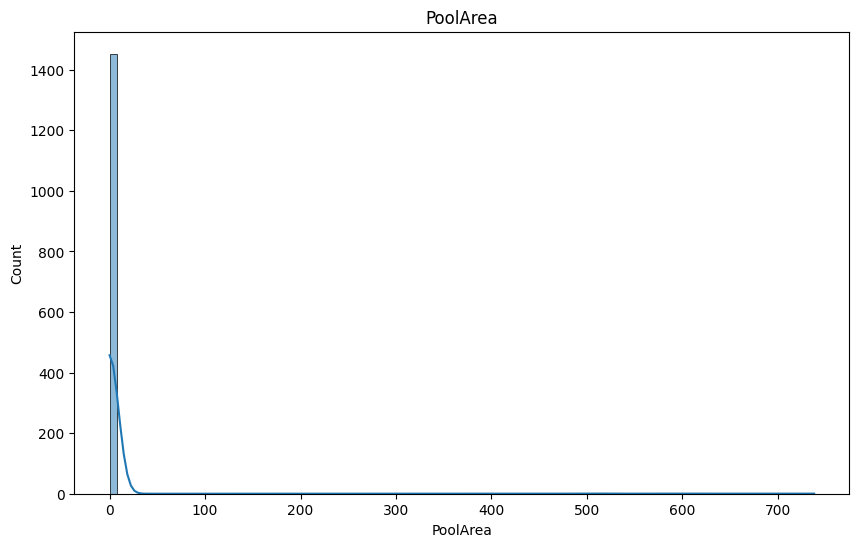

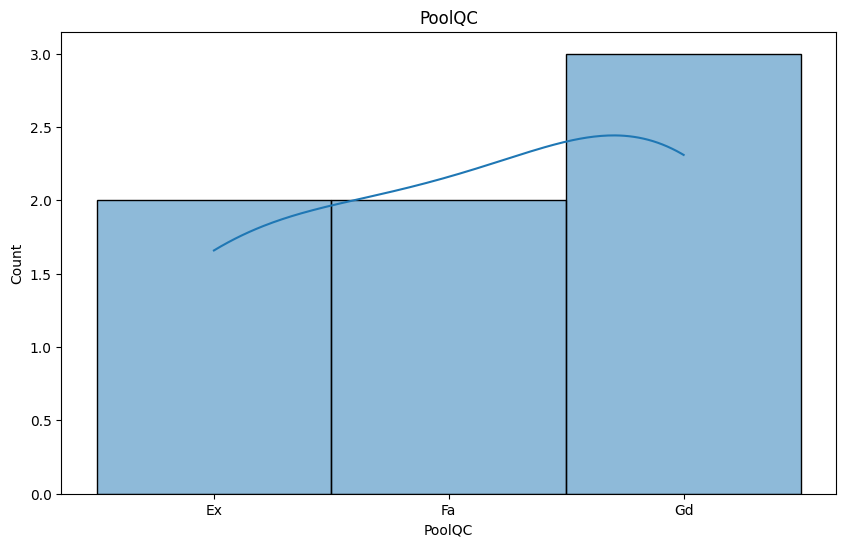

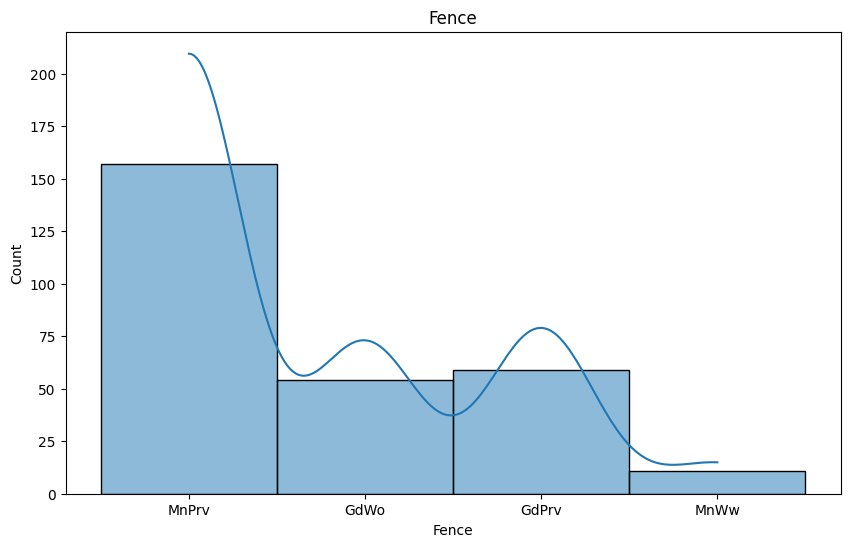

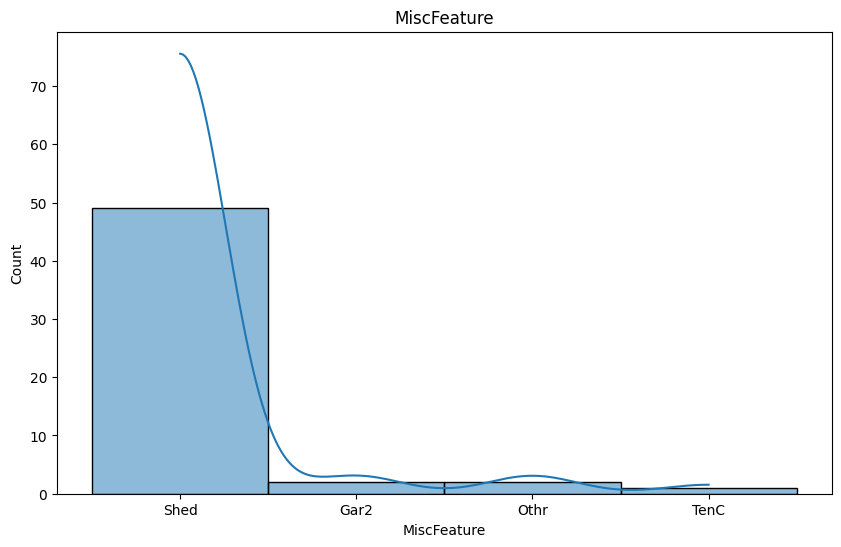

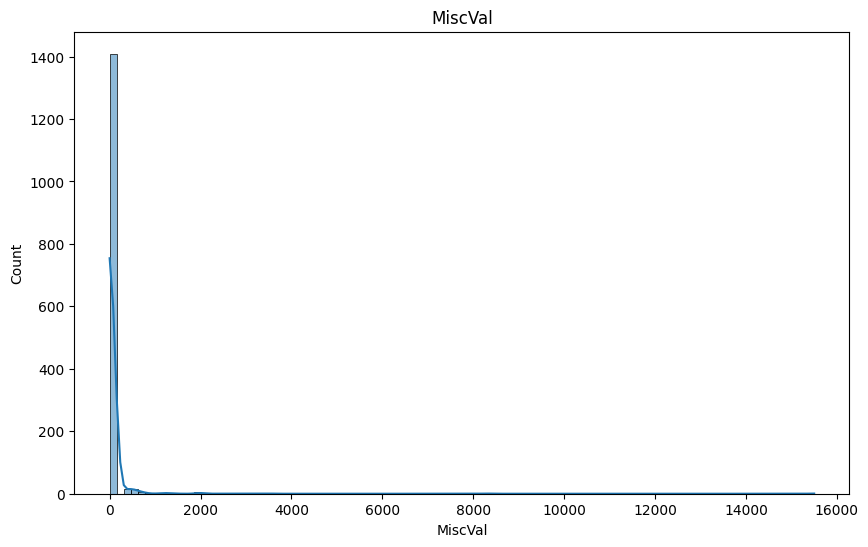

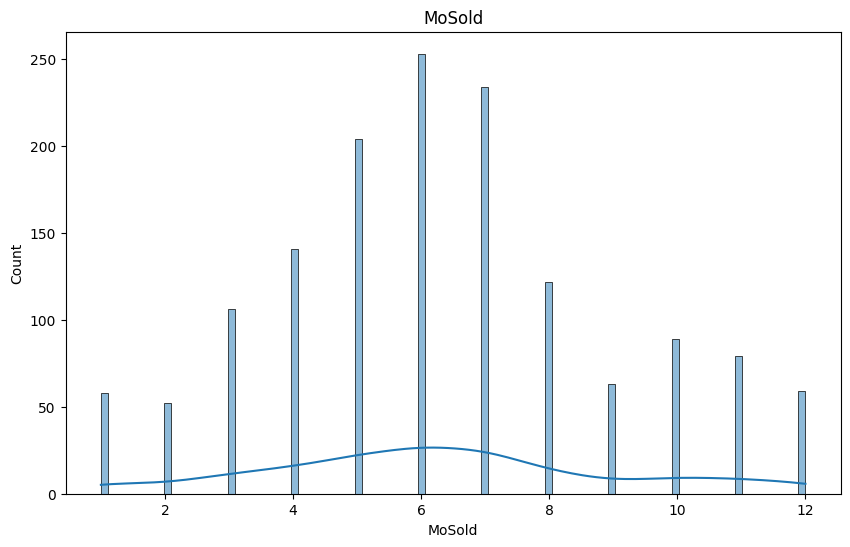

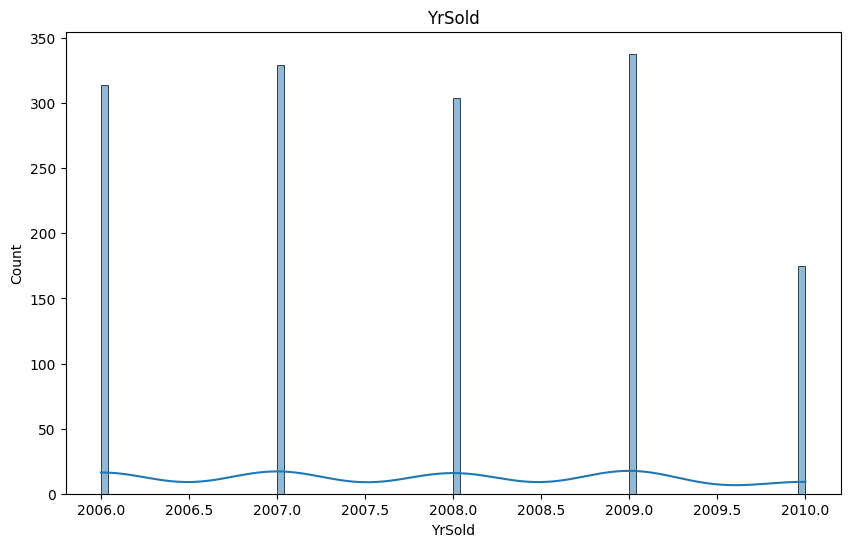

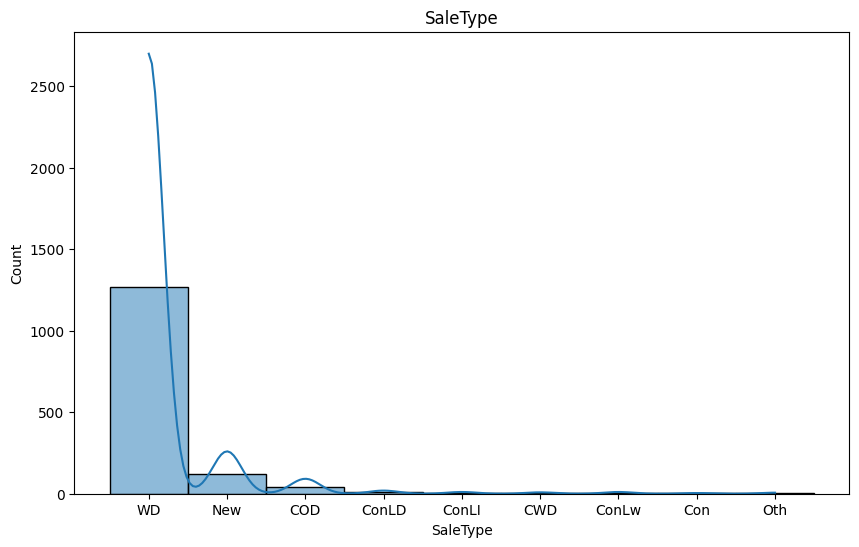

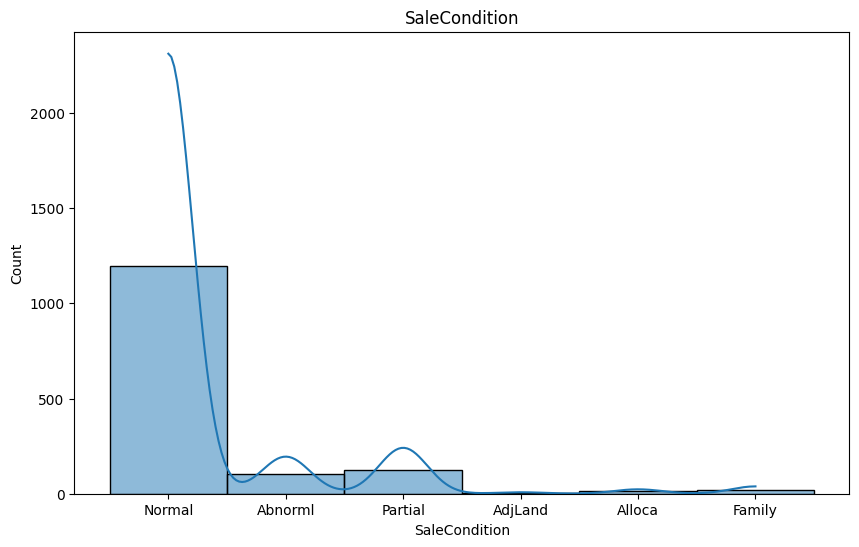

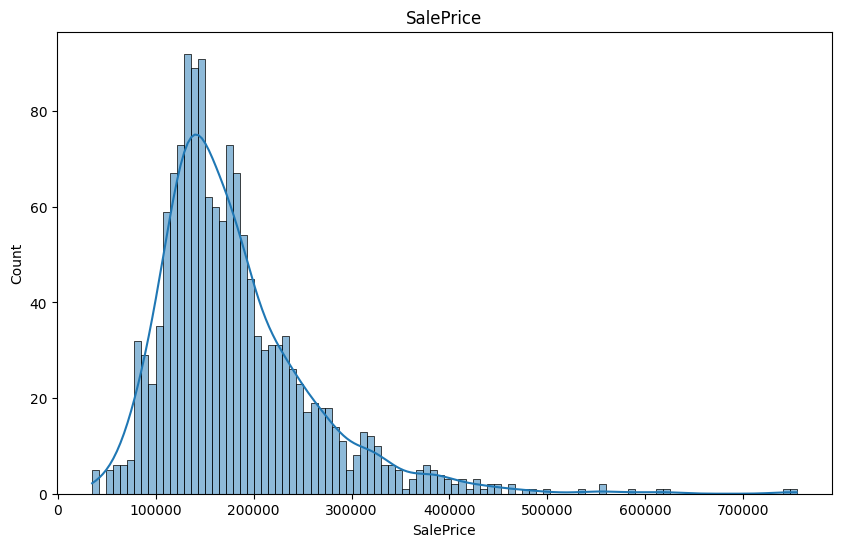

In [10]:
# Display hist plots for numerical features.
for col in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=100)   
    plt.title(f'{col}')
#     plt.xlabel('Average Monthly Hours')
#     plt.ylabel('Frequency')
    plt.show()

## Visualization : Continuous target / Numerical features






In [11]:
#Numerical Features
numerical_features = data.select_dtypes(include = 'number').columns.values.tolist()

### Numerical features with LOW number of unique values


If a numerical feature has a relatively low number of unique values, we can "see" it like a pseudo-categorical feature during visualization.


In [12]:
# Max threshold for number of unique values within a column
max_unique = 20

# Numerical features with more than X unique values
numerical_features_small_uniques = []

for col in numerical_features:
    if len(data[col].unique()) < max_unique:
        numerical_features_small_uniques.append(col)
numerical_features_small_uniques;

#### Barplot





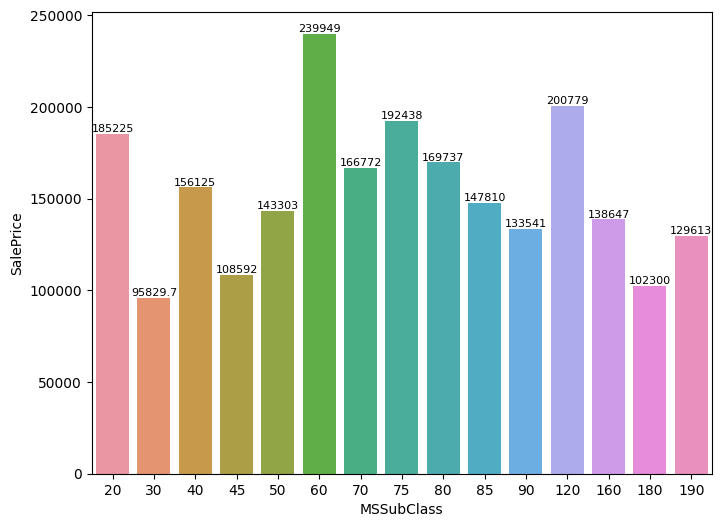

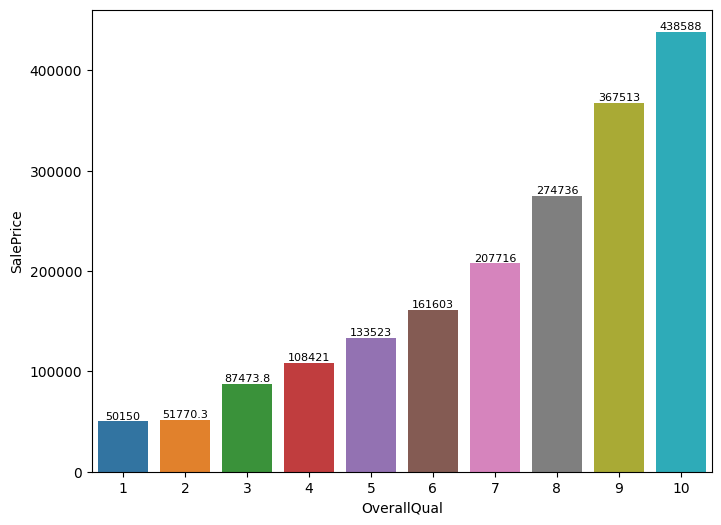

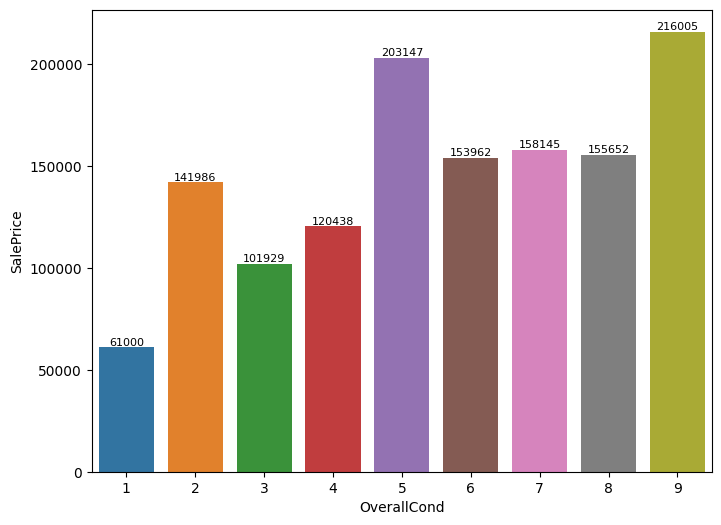

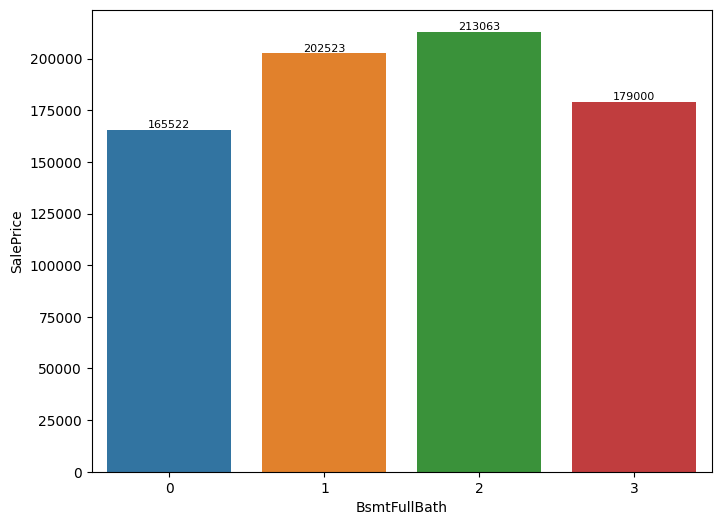

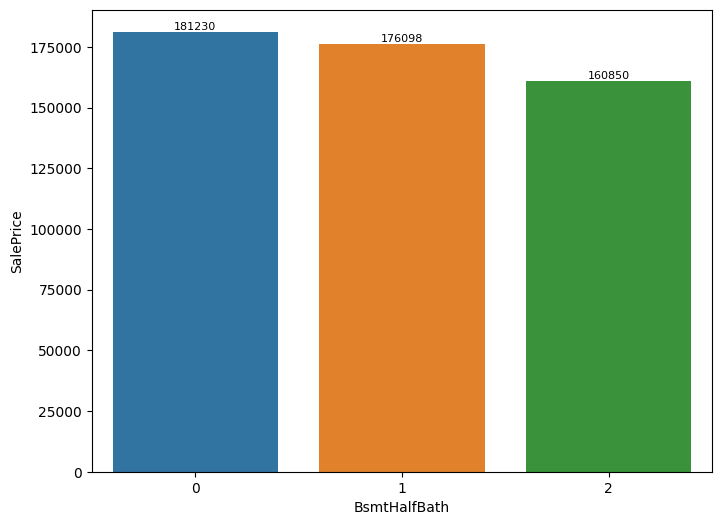

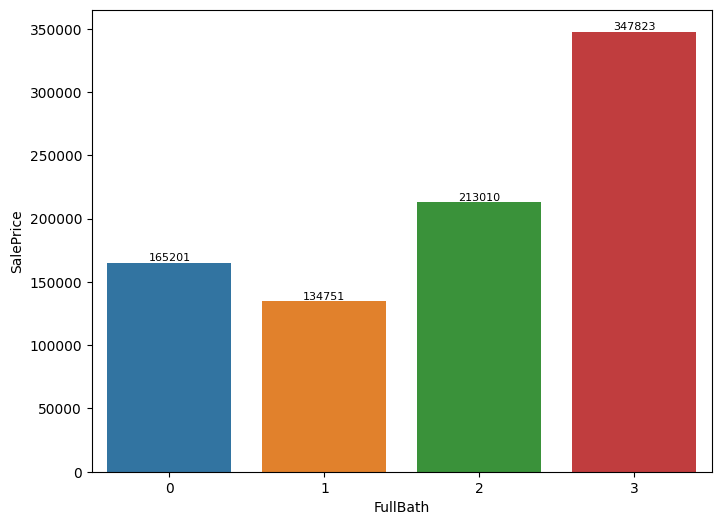

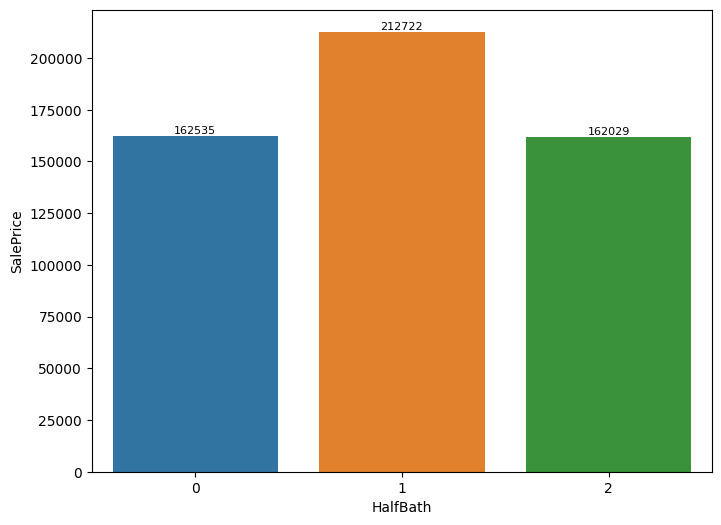

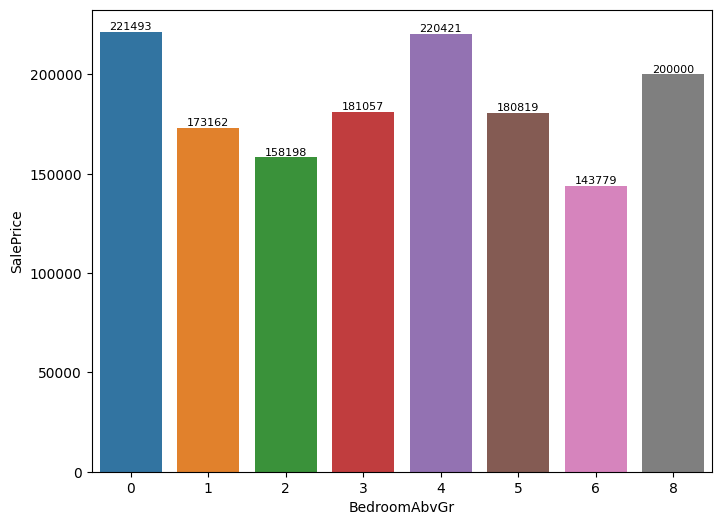

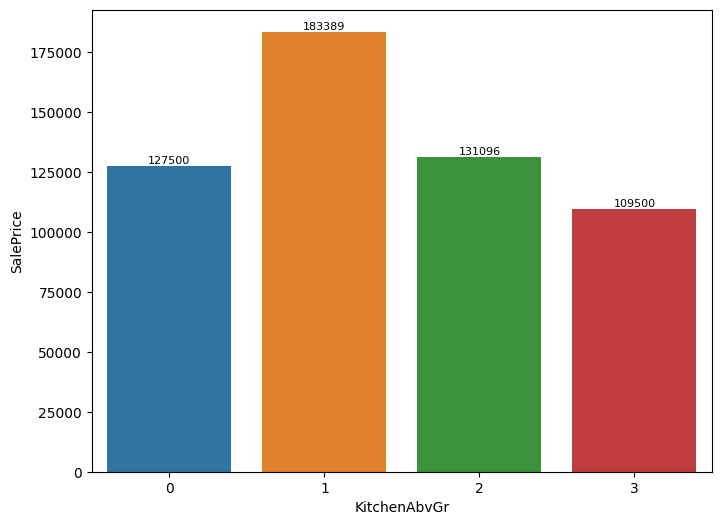

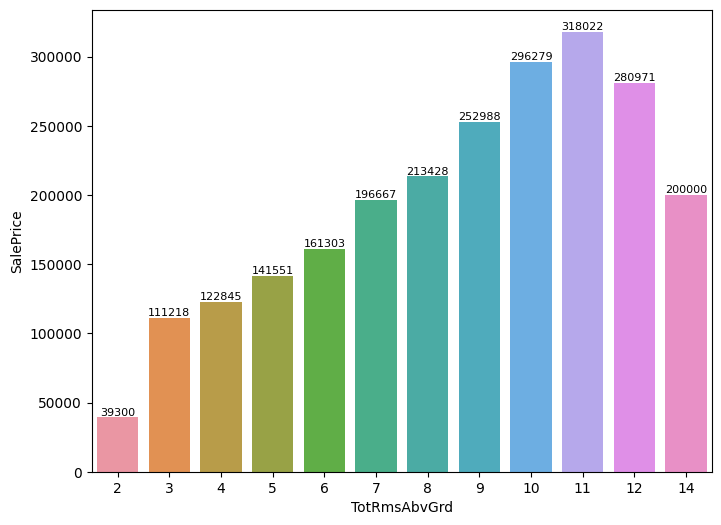

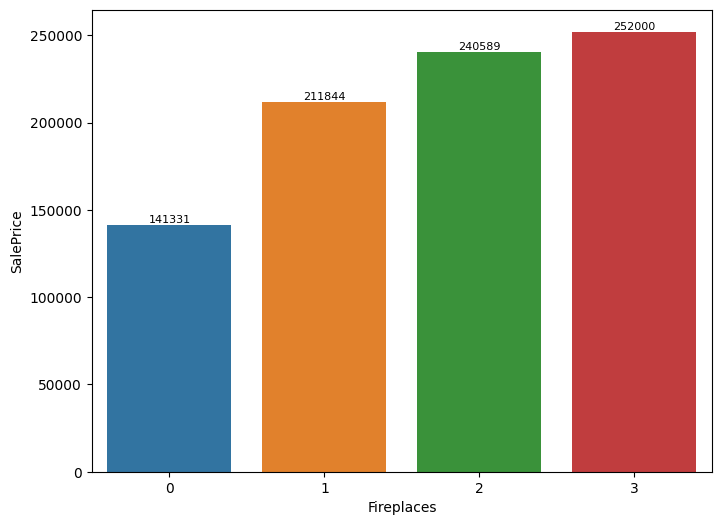

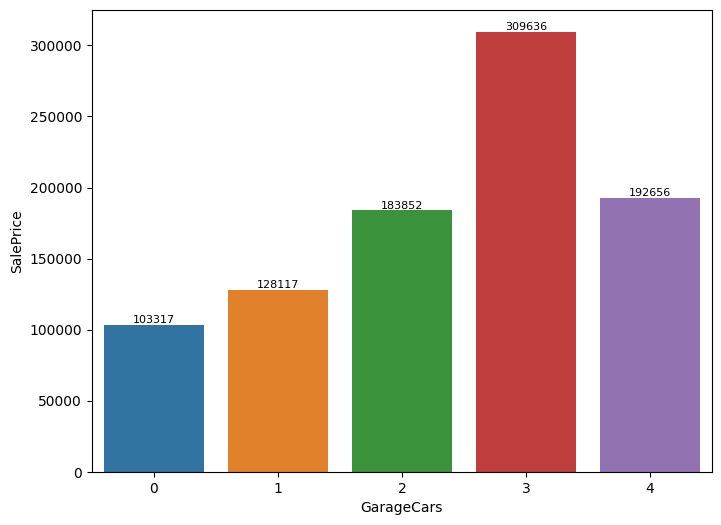

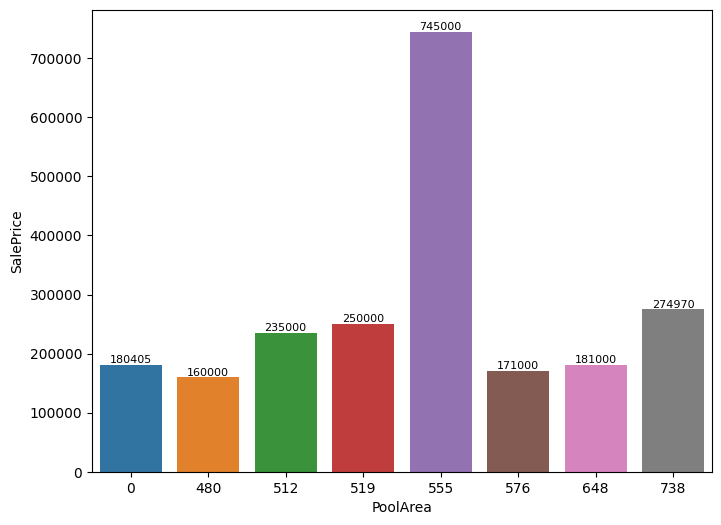

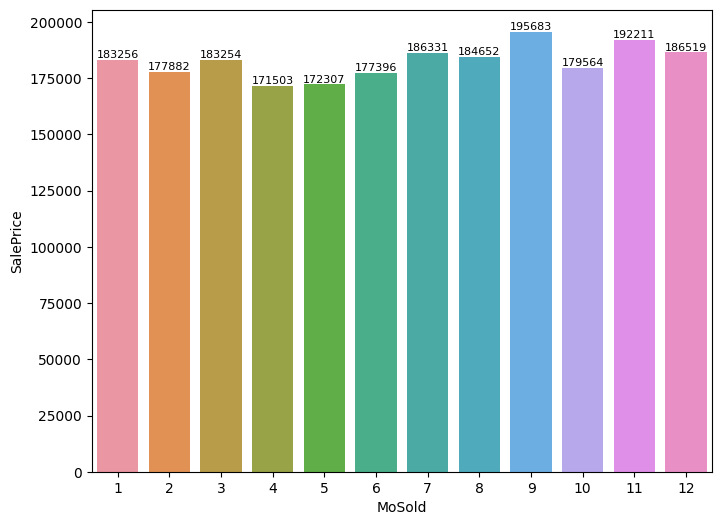

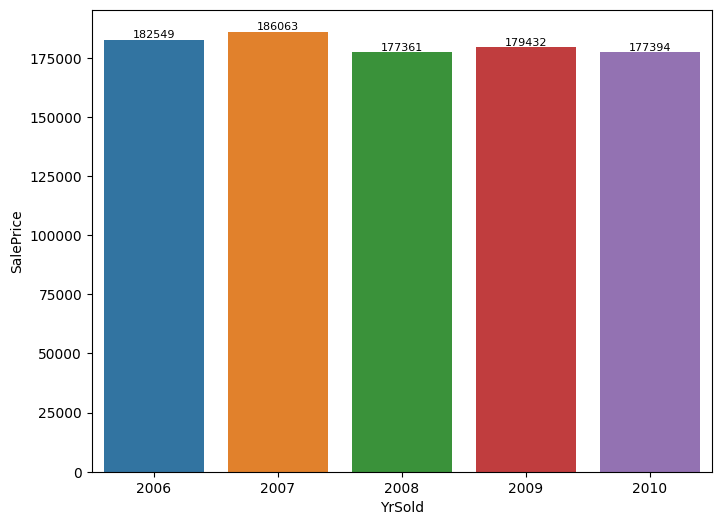

In [13]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=data,
                    x=col,
                    y=target_name,
                    ci = None) 
    ax.bar_label(ax.containers[0], fontsize=8);

In [14]:
# # Display bar plots for numerical features having a number of unique values lower than a max_threshold.
# for col in numerical_features_small_uniques:
#     plt.figure(figsize=(8, 6))
#     ax = sns.barplot(data=data,
#                     x=col,
#                     y=target_name,
#                     ci = None,
#                     order = data[target_name])
#     ax.bar_label(ax.containers[0], fontsize=8);

In [15]:
print i


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (908402389.py, line 1)

In [ ]:
# Display bar plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=data,
                    x=col,
                    y=target_name,
                    ci = None)
    ax.bar_label(ax.containers[0], fontsize=8);

#### Violin plots



In [ ]:
# Display violin plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=col,
           y=target_name,        
           data=data)

#### Box plots


In [ ]:
# Display box plots for numerical features having a number of unique values lower than a max_threshold.
for col in numerical_features_small_uniques:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data,
            x=col, 
            y=target_name)

### Numerical features with HIGH number of unique values


In [ ]:
# Numerical features with more than X unique values
numerical_features_high_uniques = []

for col in numerical_features:
    if col not in numerical_features_small_uniques:
        numerical_features_high_uniques.append(col)
numerical_features_high_uniques;

#### Scatter plots


In [ ]:
# Display scatter plots for numerical features having a number of unique values greater than a max_threshold.
for col in numerical_features_high_uniques:   
    plt.figure(figsize=(8, 8))    
    sns.scatterplot(data=data,
                    x=col,
                    y=target_name)
    plt.grid(visible=None, which='major', axis='both')       
    

### Correlation between numerical features




#### Correlation heatmap



In [ ]:
# Heatmap of pairwise correlations
correlation_matrix = data.corr()
column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, xticklabels=column_names, yticklabels=column_names,cmap= "bwr");

#### Correlation matrix 



In [ ]:
#Create a dataframe listing pair correlations and absolute correlations
correlation_matrix = data.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df

In [ ]:
#Create a dataframe listing correlations between a feature and the target and absolute correlations
corr_df[corr_df["feature_1"] == target_name].head(10)

#### Scatter matrix with high related features with the target value




In [ ]:
#Retrieve a list of the most correlated features to the target (max = threshold)
high_corr_feats = 6

high_corr_feats_serie = corr_df[corr_df["feature_1"] == target_name]['feature_2']
high_corr_feats_list = high_corr_feats_serie[:high_corr_feats].values.tolist()

# Add target name to the list of high correlated features (relatively to the target)
high_corr_feats_list.append(target_name)

In [ ]:
# Display scatter matrix for numerical
scatter_matrix(data[high_corr_feats_list], figsize= (12,8))
plt.show()

## Visualization : Continuous target / Categorical features


In [ ]:
#Categorical Features
categorical_features = data.select_dtypes(exclude = 'number').columns.values.tolist()


### Bar plot


In [ ]:
# Display bar plots for categorical features
for col in categorical_features:
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=data,
                    x=col,
                    y=target_name,
                    ci = None)
    ax.bar_label(ax.containers[0], fontsize=8);
    

In [ ]:
print i


# Prepare the dataset


## Duplicates


In [ ]:
len(data) # Check number of rows before removing duplicates
data.duplicated().sum() # Compute the number of duplicated rows
# data = data.drop_duplicates() # Remove duplicates

## Missing values


In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

### Missing values : drop columns



In [ ]:
# Attribute : PoolQC => 99% is way too high, let's drop this feature
data.drop(columns='PoolQC', inplace=True) # Drop PoolQC

In [ ]:
# Attribute : MiscFeature => 96% is way too high, let's drop this feature
data.drop(columns='MiscFeature', inplace=True) # Drop MiscFeature

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

### Missing values : replace nans



#### Alley


In [ ]:
data.Alley.unique()

In [ ]:
# Attribute : Alley => #Replace NaN by "NoAlley"
data.Alley.replace(np.nan, "NA", inplace=True) 
data.Alley.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### Fence



In [ ]:
data.Fence.unique()

In [ ]:
# Attribute : Fence => #Replace NaN by "NoFence"
data.Fence.replace(np.nan, "NA", inplace=True) 
data.Fence.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### FireplaceQu



In [ ]:
data.FireplaceQu.unique()

In [ ]:
# Attribute : FireplaceQu => #Replace NaN by "NoFirePlace"
data.FireplaceQu.replace(np.nan, "NA", inplace=True) 
data.FireplaceQu.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### LotFrontage



In [ ]:
# Attribute : LotFrontage 
data['LotFrontage'].hist(bins = 50, figsize = (12,8))

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

In [ ]:
data['LotFrontage'].describe()

In [ ]:
data.LotFrontage.unique()

In [ ]:
# Attribute : LotFrontage => #Replace NaN by mean value
LotFrontage_imputer = SimpleImputer(strategy='mean')
data.LotFrontage = LotFrontage_imputer.fit_transform(data[['LotFrontage']])

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### GarageYrBlt



In [ ]:
# Attribute : GarageYrBlt 
data['GarageYrBlt'].hist(bins = 50, figsize = (12,8))

In [ ]:
data.GarageYrBlt.unique()

In [ ]:
# Attribute : GarageYrBlt => #Replace NaN by most frequent value
GarageYrBlt_imputer = SimpleImputer(strategy='most_frequent')
data.GarageYrBlt = GarageYrBlt_imputer.fit_transform(data[['GarageYrBlt']])

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### GarageType



In [ ]:
data.GarageType.unique()

In [ ]:
# Attribute : GarageType => #Replace NaN by "NoGarage"
data.GarageType.replace(np.nan, "NA", inplace=True) 
data.GarageType.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### GarageFinish


In [ ]:
data.GarageFinish.unique()

In [ ]:
# Attribute : GarageFinish => #Replace NaN by "NoGarage"
data.GarageFinish.replace(np.nan, "NA", inplace=True) 
data.GarageFinish.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### GarageQual



In [ ]:
data.GarageQual.unique()

In [ ]:
# Attribute : GarageQual => #Replace NaN by "NoGarage"
data.GarageQual.replace(np.nan, "NA", inplace=True) 
data.GarageQual.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### GarageCond



In [ ]:
data.GarageCond.unique()

In [ ]:
# Attribute : GarageCond => #Replace NaN by "NoGarage"
data.GarageCond.replace(np.nan, "NA", inplace=True) 
data.GarageCond.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### BsmtFinType2



In [ ]:
data.BsmtFinType2.unique()

In [ ]:
# Attribute : BsmtFinType2 => #Replace NaN by "NoBasement"
data.BsmtFinType2.replace(np.nan, "NA", inplace=True) 
data.BsmtFinType2.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### BsmtExposure


In [ ]:
data.BsmtExposure.unique()

In [ ]:
# Attribute : BsmtExposure => #Replace NaN by "NoBasement"
data.BsmtExposure.replace(np.nan, "NA", inplace=True) 
data.BsmtExposure.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### BsmtFinType1


In [ ]:
data.BsmtFinType1.unique()

In [ ]:
# Attribute : BsmtFinType1 => #Replace NaN by "NoBasement"
data.BsmtFinType1.replace(np.nan, "NA", inplace=True) 
data.BsmtFinType1.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### BsmtQual


In [ ]:
data.BsmtQual.unique()

In [ ]:
# Attribute : BsmtQual => #Replace NaN by "NoBasement"
data.BsmtQual.replace(np.nan, "NA", inplace=True) 
data.BsmtQual.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### BsmtCond


In [ ]:
data.BsmtCond.unique()

In [ ]:
# Attribute : BsmtCond => #Replace NaN by "NoBasement"
data.BsmtCond.replace(np.nan, "NA", inplace=True) 
data.BsmtCond.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### MasVnrType


In [ ]:
data.MasVnrType.value_counts()

In [ ]:
data.MasVnrType.unique()

In [ ]:
data.MasVnrType.hist(bins = 50, figsize = (12,8))

In [ ]:
# Attribute : MasVnrType => #Replace NaN by most_frequent value
MasVnrType_imputer = SimpleImputer(strategy='most_frequent')
data.MasVnrType =  MasVnrType_imputer.fit_transform(data[['MasVnrType']])
data.MasVnrType.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### MasVnrArea


In [ ]:
data.MasVnrArea.describe()

In [ ]:
data.MasVnrArea.hist(bins=50, figsize=(12,8))


In [ ]:
# Attribute : MasVnrArea => #Replace NaN by most_frequent value
MasVnrArea_imputer = SimpleImputer(strategy='most_frequent')
data.MasVnrArea =  MasVnrArea_imputer.fit_transform(data[['MasVnrArea']])
data.MasVnrArea.value_counts()#Check count of each category

In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

#### Electrical


In [ ]:
data.Electrical.unique()

In [ ]:
data.Electrical.hist(bins = 50, figsize =(12,8))

In [ ]:
# Attribute : Electrical => #Replace NaN by most_frequent value
Electrical_imputer = SimpleImputer(strategy='most_frequent')
data.Electrical =  Electrical_imputer.fit_transform(data[['Electrical']])
data.Electrical.value_counts()#Check count of each category


In [ ]:
# Counting the percentage of NaN for each column
missing_data = data.isnull().sum().sort_values(ascending=False)/len(data)*100 #NaN percentage for each column
# missing_data
missing_data[missing_data > 0]

## Check correlation again


In [ ]:
correlation_matrix = data.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df

In [ ]:
corr_df[corr_df["feature_1"] == "SalePrice"].head(10)

## Check outliers


In [ ]:
numerical_columns = data.select_dtypes(include = np.number).columns
numerical_columns = numerical_columns.drop('SalePrice') #We don't take SalePrice into account on purpose
numerical_columns.shape

In [ ]:
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(13, 3, i)    
    sns.boxplot(x=data[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()

In [ ]:
numerical_columns

In [ ]:
numerical_columns_w_outliers = ['MSSubClass', 'LotFrontage','LotArea',
                                'OverallQual','OverallCond','YearBuilt',
                                'MasVnrArea','BsmtFinSF1','BsmtFinSF2',
                                'BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                                '2ndFlrSF', 'LowQualFinSF','GrLivArea',
                                'BsmtFullBath','BsmtHalfBath','BedroomAbvGr',
                                'KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                                'GarageYrBlt','GarageCars','GarageArea',
                                'WoodDeckSF','OpenPorchSF','EnclosedPorch',
                                '3SsnPorch','ScreenPorch','PoolArea',
                                'MiscVal']

In [ ]:
sns.boxplot(x=data['EnclosedPorch'], palette='Set2')



### Implement Robust scaler



In [ ]:
data[numerical_columns_w_outliers].describe()

In [ ]:
#Instanciate, fit, transform
rb_scaler = RobustScaler()
data[numerical_columns_w_outliers] = rb_scaler.fit_transform(data[numerical_columns_w_outliers])

In [ ]:
data[numerical_columns_w_outliers].describe()

## Check cols with no outliers


In [ ]:
numerical_columns_no_outliers = []
for col in numerical_columns:
    if col not in numerical_columns_w_outliers:
        numerical_columns_no_outliers.append(col)
        
numerical_columns_no_outliers


In [ ]:
plt.figure(figsize=(10, 20))

for i, column in enumerate(numerical_columns_no_outliers, 1):
    plt.subplot(13, 3, i)    
    sns.boxplot(x=data[column], palette='Set2')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


In [ ]:
data[numerical_columns_no_outliers].describe()

### Implement MinmaxScaler


In [ ]:
#Instanciate, fit, transform
minmax_scaler = MinMaxScaler()
data[numerical_columns_no_outliers] = minmax_scaler.fit_transform(data[numerical_columns_no_outliers])

In [ ]:
data[numerical_columns_no_outliers].describe()

In [ ]:
data[numerical_columns]

## Categorical columns


In [ ]:
categorical_columns = data.select_dtypes(include = 'object').columns
categorical_columns

In [ ]:
len(categorical_columns)

## Check Balancing



In [ ]:
for col in categorical_columns:
    print(f' -- {col} -- ')
    print(data[col].value_counts())
    print('-------------------------') 

## Encoding


In [ ]:
categorical_columns

In [ ]:
# Categorical columns to be encoded with OneHotEncoder
categorical_columns_ohe = ['MSZoning', 'Street', 'Alley','LotShape',
                           'LandContour','Utilities','LotConfig','LandSlope',
                           'Neighborhood','Condition1','Condition2','BldgType',
                           'HouseStyle', 'RoofStyle', 'RoofMatl','Exterior1st',
                           'Exterior2nd','MasVnrType','Foundation','Heating', 
                           'CentralAir','Electrical','Functional','GarageType',
                           'PavedDrive','Fence','SaleType','SaleCondition']


In [ ]:
# Categorical columns to be encoded with OrdinalEncoder
categorical_columns_ordinal = ['ExterQual','ExterCond','BsmtQual','BsmtCond', 
                               'BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
                               'KitchenQual','FireplaceQu','GarageFinish','GarageQual',
                               'GarageCond']


In [ ]:
len(categorical_columns)

In [ ]:
len(categorical_columns_ohe) + len(categorical_columns_ordinal)

### One Hot Encoding



In [ ]:
# Instantiate, fit
ohe_encoder = OneHotEncoder(sparse_output=False, 
                    drop = 'if_binary')
ohe_encoder.fit(data[categorical_columns_ohe])

In [ ]:
#Transform 
data[ohe_encoder.get_feature_names_out()] = ohe_encoder.transform(data[categorical_columns_ohe]);

In [ ]:
#Drop initial features
data.drop(columns=categorical_columns_ohe, inplace=True)
print(data.shape);

### Ordinal Encoding


In [ ]:
# Ordering the 'lowest' category to the 'highest' category in ordinal categorical features 
# (KEEP THE ORDER of XXX_cat AND in the subsequent lists)

ExterQual_cat = ['Po','Fa','TA','Gd','Ex']
ExterCond_cat = ['Po','Fa','TA','Gd','Ex']

BsmtQual_cat = ['NA','Po','Fa','TA','Gd','Ex']
BsmtCond_cat = ['NA','Po','Fa','TA','Gd','Ex']

BsmtExposure_cat = ['NA','No','Mn','Av','Gd']

BsmtFinType1_cat = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']
BsmtFinType2_cat = ['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ']

HeatingQC_cat = ['Po','Fa','TA','Gd','Ex']
KitchenQual_cat = ['Po','Fa','TA','Gd','Ex']

FireplaceQu_cat = ['NA','Po','Fa','TA','Gd','Ex']

GarageFinish_cat = ['NA','Unf','RFn','Fin']

GarageQual_cat = ['NA','Po','Fa','TA','Gd','Ex']
GarageCond_cat = ['NA','Po','Fa','TA','Gd','Ex']


ordered_categories = [ExterQual_cat, ExterCond_cat,BsmtQual_cat,BsmtCond_cat,
                      BsmtExposure_cat, BsmtFinType1_cat, BsmtFinType2_cat,
                      HeatingQC_cat, KitchenQual_cat, FireplaceQu_cat,
                      GarageFinish_cat, GarageQual_cat, GarageCond_cat]

In [ ]:
# Instantiate, fit
ordinal_encoder = OrdinalEncoder(categories = ordered_categories)
ordinal_encoder.fit(data[categorical_columns_ordinal])

In [ ]:
# for col in categorical_columns_ordinal:
#     print(f' -- {col} -- ')
#     print(data[col].value_counts())
#     print('-------------------------') 

In [ ]:
# Create encoded ordinal categorical features names
encoded_categorical_columns_ordinal =[]
for col in ordinal_encoder.get_feature_names_out():
    encoded_categorical_columns_ordinal.append(f'encoded_{col}') 

In [ ]:
#Transform
data[encoded_categorical_columns_ordinal] = ordinal_encoder.transform(data[categorical_columns_ordinal])
print(data.shape)
data.columns

In [ ]:
#Drop initial features
data.drop(columns=categorical_columns_ordinal, inplace=True)
print(data.shape)

## Check correlation again



In [ ]:
correlation_matrix = data.corr()

# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]

corr_df['absolute_correlation'] = np.abs(corr_df['correlation'])

corr_df.sort_values(by="absolute_correlation", ascending=False, inplace = True)
corr_df


In [ ]:
corr_df[corr_df["feature_1"] == "SalePrice"].head(20)